# **Traveler Review**
**By Feihong Shi**

# **Contents**

- [Introduce](#Introduce)
- [Processing and Data exploration](#Processing-and-Data-exploration)
  - [Import libraries](#Import-libraries)
  - [Various DataSet Informations](#Various-DataSet-Informations)
  - [Set Interface for Label](#Set-Interface-for-Label)
  - [Read the CSV](#Read-the-CSV)
  - [Draw BoxPlot](#Draw-BoxPlot)
  - [Label DataSet](#Label-DataSet)
  - [Data Clean](#Data-Clean)
  - [Draw Figures](#Draw-Figures)
  - [Correlation Figure](#Correlation-Figure)
- [PCA](#PCA)
- [Cluster Algorithm](#Cluster-Algorithm)
  - [Kmeans](#Kmeans)
  - [DBSCAN](#DBSCAN)
- [Regression](#Regression)
  - [Linear Regression](#Linear-Regression)
- [Classification](#Classification)
  - [Logistic Regression](#Logistic-Regression)
  - [Decision Trees](#Decision-Trees)
  - [Random Forest](#Random-Forest)
  - [Support Vector Classification](#Support-Vector-Classification)
  - [Bayes](#Bayes)
  - [KNN](#KNN)
- [Conclusion](#Conclusion)
- [Tools](#Tools)

# **Introduce**
In this report, we analysed the Travel Reviews DataSet. The data set contains 980 instabces with 10 predictor variables. Reviews on destinations in 10 categories mentioned across East Asia are considered. Each traveler rating is mapped as Excellent(4), Very Good(3), Average(2), Poor(1), and Terrible(0) and average rating is used. Each row represents a traveler and the columns contain the traveler's id and the rates of destinations which are rated by the traveler. Those columns are described in the following:

* Attribute 1 : Unique user id (string)
* Attribute 2 : Average user feedback on **art galleries** (float, 0.0~4.0)
* Attribute 3 : Average user feedback on **dance clubs** (float, 0.0~4.0)
* Attribute 4 : Average user feedback on **juice bars** (float, 0.0~4.0)
* Attribute 5 : Average user feedback on **restaurants** (float, 0.0~4.0)
* Attribute 6 : Average user feedback on **museums** (float, 0.0~4.0)
* Attribute 7 : Average user feedback on **resorts** (float, 0.0~4.0)
* Attribute 8 : Average user feedback on **parks/picnic spots** (float, 0.0~4.0)
* Attribute 9 : Average user feedback on **beaches** (float, 0.0~4.0)
* Attribute 10 : Average user feedback on **theaters** (float, 0.0~4.0)
* Attribute 11 : Average user feedback on **religious institutions** (float, 0.0~4.0)

[This is the Dataset link ](http://archive.ics.uci.edu/ml/datasets/Travel+Reviews)

In the content, I devided it into four sections which details are fellowing:

1. For the first section, I decided the label attribute by analyzing the Barplot and Basic statistics. I also used two methods to clean our dataset, the one cleans the dataset by replacing the outliers with Median, the other one delete the ourliers from the dataset. Besides, I draw some plot to visualize some information of our data set

2. For the second section, I tried to use the PCA model to reduce the dimensions. Reducing the dimensions is better for our models fitting time.

3. For the third section, I tried to use two cluster models to clustering the dataset. These two models' were meascure by the contour factor. If it clusters very well, we can creat a new label to represent the clusters. In that case, we do not need to choose a attribute as our label attribute.

4. For the forth section, because our label attribut's value are continuos type, I used the linear model to predict the value. The regression model was measured by MSE.

5. For the fifth section, I used six kinds classification models, which were measured by using Accuracy, Precision, Recall, F1 score and Fitting time, on our dataset.

6. For the last section, I conclued all the models and libraries which were used in the report. Especially, I draw a table to show the classifiers' perfromance and visualized the models' scores and fitting time.

The more details are fellowing:

# **Processing and Data exploration**

## **Import libraries**

* pandas: I used the pandas as our file loader and dealer.
* matplotlib: I used this to draw the plot so that we can analyze the data handfully.
* seaborn: Its function same to the matplotlib, so we also used this to draw some figures.
* numpy: I used this to process the data which was loaded by pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## **Various DataSet Informations**

There are some DataFrames which were used to store the specific data, the details are fellowing:

* **df**: raw dataset, read directly from the CSV file.
* **df_pre**: raw without User ID attribute. Used as the dataset interface, for example, if we want use df_pre_clean as our dataset, we just need add "df_pre = df_pre_clean"
* **df_pre_clean**: Clean, with out User ID, outliers were replaced with median
* **df_pre_clean_witoutOutliers**: Clean, without User ID, outliers were deleted

## **Set Interface for Label**
Setting a interface for the labeled attribute, so that we can change the labeled attribute handfully. For example, if we want to fit our models by different labeled attributes, we just need change the LABEL = “<attribute name>”, i.e., LABEL = "Museum".

In [2]:
LABLE = "Juice bars"

## **Read the CSV**
Read data from CSV file and change its column name by the attribute real names. Besides, drop the useless attribute, User ID, from the DataFrame.

From the top-3 rows of df DataFrame, we can see that there are 11 attributes, and their names are very similar. So I changed their names accoding to the dataset description. I used the head() method to show the first 3 rows data.

In [3]:
df = pd.read_csv("../input/tripadvisor/tripadvisor_review.csv")
df.columns=['User ID', 'Art galleries', 'Dance clubs', 'Juice bars', 'Restaurants','Museums', 'Resorts', 'Parks/picnic spots','Beaches', 'Theaters', 'Religious institutuions']
df.head(3)

,User ID,Art galleries,Dance clubs,Juice bars,Restaurants,Museums,Resorts,Parks/picnic spots,Beaches,Theaters,Religious institutuions
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50


In [4]:
df.describe()

,Art galleries,Dance clubs,Juice bars,Restaurants,Museums,Resorts,Parks/picnic spots,Beaches,Theaters,Religious institutuions
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


From the description of DataFrame df, we can see that it contains count, mean, std, min, 25%, 50%, 75% and max of each attribute of the dataset. We can get some useful information from them, which are fellowing:

* count: all the attributs have 980 items
* mean: Restaurants get the min mean, which means most of the users do not like the Restauransts. And Parks/picnic spots get the max mean, which means most of the users quite like Parks/picnic spots.
* std: Parks/picnic spots get the min mean, which means most of the users have almost same view of this destination. And Juice bars get the max mean, which means most of the users have very different view of this destination.
* max, 25%, 50%, 75%, min: I think there are not too much useful information of these statistics.

In summary, because the std of Juice bars is the biggest one, we can set the Juice bars as our label attribute for our classification models.

Because the User ID attribute is not helpful for our tasks, I dropped them from the df DataFrame and make a new DataFram without User ID attributs.

In [5]:
df_pre = df.drop(["User ID"], axis = 1)

## **Draw BoxPlot**
Draw the box plot, so that we can find some useful information.

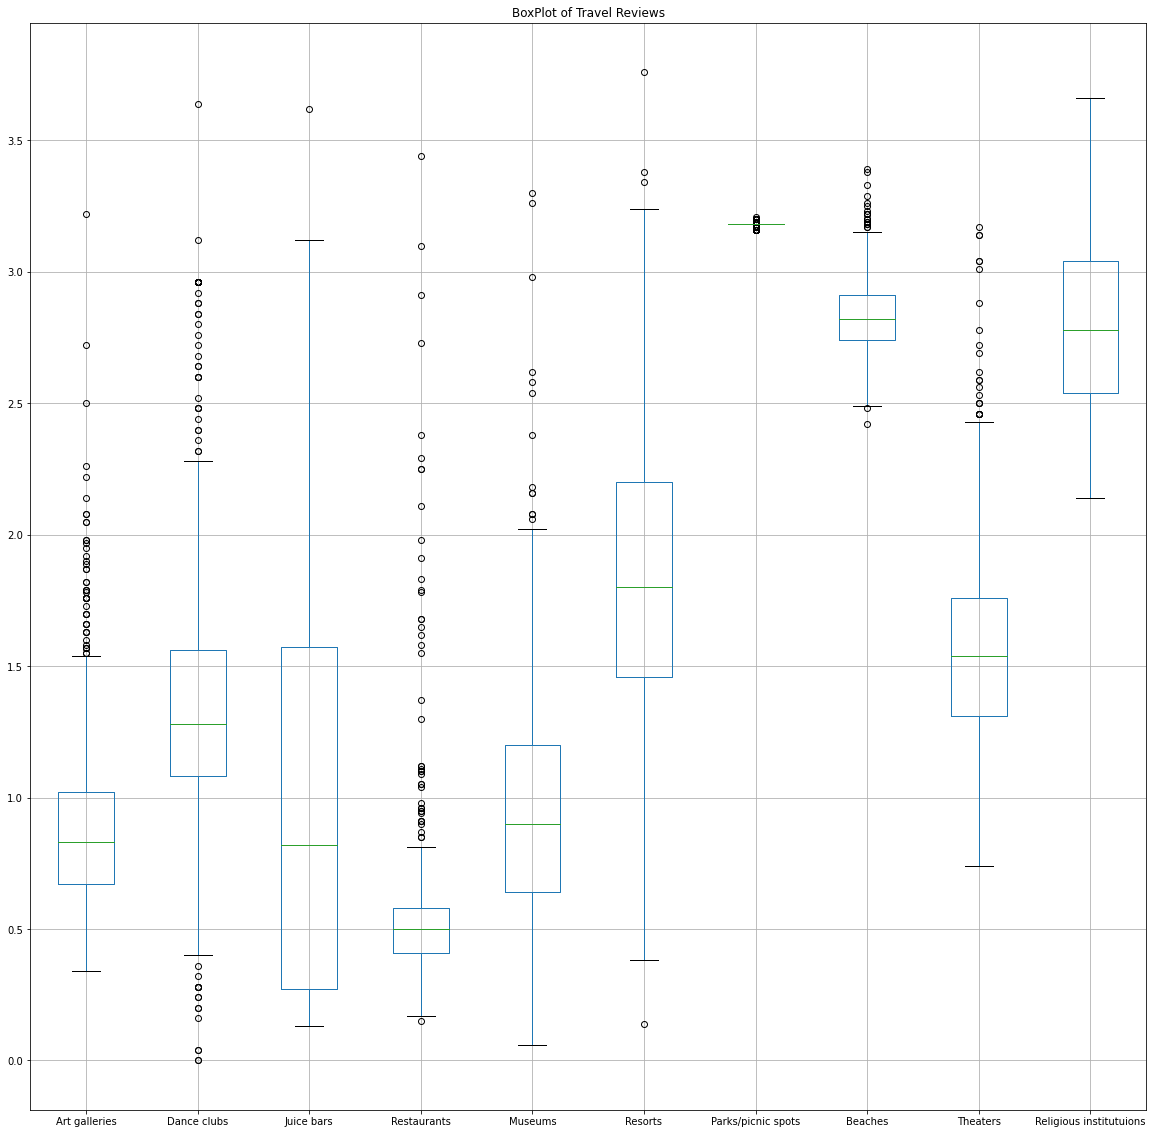

In [6]:
%matplotlib inline
# Chinese settings
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# Set figsize
plt.figure(figsize=(20,20))
# Set title
plt.title('BoxPlot of Travel Reviews')
# Draw the boxs
df[['User ID', 'Art galleries', 'Dance clubs', 'Juice bars', 'Restaurants','Museums', 'Resorts', 'Parks/picnic spots','Beaches', 'Theaters', 'Religious institutuions']].boxplot()
plt.savefig("boxPlot.png")

We can see in the boxplot there are some outliers in these attributes. Because the outliers may be cause problems on Machine Learning models, such as Kmeans, we need to deal those outliers. 

Besides, as for the Classification Models, I choose the Juice bars as label. And there are 5 labels for it, they are Excellent(4), Very Good(3), Average(2), Poor(1), and Terrible(0).

## **Label DataSet**

As for the classification models, we need set labels. However, the values of Jucice bars are continuous, so we need map them to discrete kind value.

Therefore, I used the arround function to map the values of the "Juice bars" attribute.

In [7]:
df_LABEL = df_pre.copy()
df_LABEL_X = df_LABEL[[i for i in df_LABEL.columns if LABLE not in i ]]
df_LABEL_Y = df_LABEL[[i for i in df_LABEL.columns if LABLE in i ]]

np_LABEL_Y = np.array(df_LABEL_X)
np_LABEL_Y = np.around(df_LABEL_Y, decimals=0)

df_LABEL_Y = pd.DataFrame(np_LABEL_Y, columns=[LABLE], dtype = int)
df_LABEL = pd.concat([df_LABEL_Y, df_LABEL_X], axis = 1)
df_LABEL.head(3)

,Juice bars,Art galleries,Dance clubs,Restaurants,Museums,Resorts,Parks/picnic spots,Beaches,Theaters,Religious institutuions
0,2,0.93,1.8,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,3,1.02,2.2,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1,1.22,0.8,0.53,0.24,1.54,3.18,2.80,1.31,2.50


From the table, we can see that we already map the continuous values to discrete values.

## **Data Clean**

As we know, the value(outlier) satisfy this formula $|value - median| > 2*std$. Because the outliers may cause some problems for some models, we need to deal these outliers. I used two method to deal these outliers. The details are fellowing:

* I replaced the ourliers with the median
* I deleted the ourliers from the dataset

In [8]:
categorical_features = ['Art galleries', 'Dance clubs', 'Juice bars', 'Restaurants','Museums', 'Resorts', 'Parks/picnic spots','Beaches', 'Theaters', 'Religious institutuions']
df_pre_clean = pd.DataFrame()
for column in categorical_features:
    df_pre_middle_clean = df_pre[[i for i in df_pre.columns if column in i ]]
    median = df_pre_middle_clean[column].median()
    std = df_pre_middle_clean[column].std()
    np_pre_middle_clean = df_pre_middle_clean.values
    for ind, val in enumerate(np_pre_middle_clean):
        a = abs(val - median)
        if a > (2*std):
            np_pre_middle_clean[ind] = median
    df_pre_middle_clean = pd.DataFrame(np_pre_middle_clean)
    df_pre_middle_clean.columns = [column]
    df_pre_clean = pd.concat([df_pre_clean, df_pre_middle_clean], axis = 1)
df_pre_clean.head(3)

,Art galleries,Dance clubs,Juice bars,Restaurants,Museums,Resorts,Parks/picnic spots,Beaches,Theaters,Religious institutuions
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,0.82,0.64,1.42,1.80,3.18,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50


In this section, I use the median to replace all the outliers.

In [9]:
categorical_features = ['Art galleries', 'Dance clubs', 'Juice bars', 'Restaurants','Museums', 'Resorts', 'Parks/picnic spots','Beaches', 'Theaters', 'Religious institutuions']
df_pre_clean = pd.DataFrame()
for column in categorical_features:
    df_pre_middle_clean = df_pre[[i for i in df_pre.columns if column in i ]]
    median = df_pre_middle_clean[column].median()
    std = df_pre_middle_clean[column].std()
    np_pre_middle_clean = df_pre_middle_clean.values
    for ind, val in enumerate(np_pre_middle_clean):
        a = abs(val - median)
        if a > (2*std):
            np_pre_middle_clean[ind] = np.nan
    df_pre_middle_clean = pd.DataFrame(np_pre_middle_clean)
    df_pre_middle_clean.columns = [column]
    df_pre_clean = pd.concat([df_pre_clean, df_pre_middle_clean], axis = 1)
df_pre_clean_witoutOutliers = df_pre_clean.dropna()
print(df_pre_clean_witoutOutliers.shape[0])

df_pre_clean_witoutOutliers.head(3)

638


,Art galleries,Dance clubs,Juice bars,Restaurants,Museums,Resorts,Parks/picnic spots,Beaches,Theaters,Religious institutuions
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86


In this section, I delete all the rows with outliers

## **Draw Figures**

### **1.8.1 - Pie Figure**

([<matplotlib.patches.Wedge at 0x7f3a730318d0>,
 [Text(0.5469433334441574, 0.9543861849382531, 'Excellent'),
  Text(0.407340235298531, 1.0217993602987514, 'VeryGood'),
  Text(-0.49519576018472594, 0.9822327418158445, 'Average'),
  Text(-0.8672940589505902, -0.6766099432531348, 'Poor'),
  Text(1.080823105533966, -0.20450284727581, 'Terrible')],
 [Text(0.29833272733317673, 0.5205742826935925, '0.1%'),
  Text(0.22218558289010779, 0.5573451056175007, '4.4%'),
  Text(-0.27010677828257773, 0.5357633137177333, '22.6%'),
  Text(-0.4730694867003219, -0.3690599690471644, '33.7%'),
  Text(0.5895398757457997, -0.11154700760498726, '39.3%')])

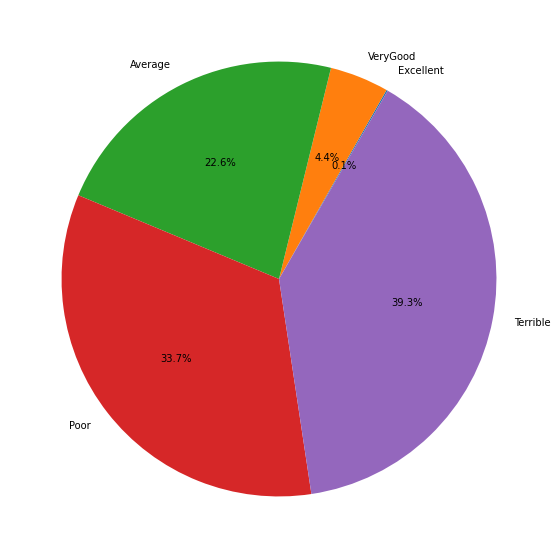

In [10]:
Excellent = df_LABEL_Y.value_counts()[4]
VeryGood = df_LABEL_Y.value_counts()[3]
Average = df_LABEL_Y.value_counts()[2]
Poor = df_LABEL_Y.value_counts()[1]
Terrible = df_LABEL_Y.value_counts()[0]
lables = ["Excellent", "VeryGood", "Average", "Poor", "Terrible"]
values = [Excellent, VeryGood, Average, Poor, Terrible]
plt.figure(figsize=(10,10))
plt.pie(values, labels = lables, startangle =60, autopct='%1.1f%%')

From the pie, we can see that:
* Excellent: 0.1%
* VeryGood: 4.4%
* Average: 22.6%
* Poor: 33.7%
* Terrible: 39.3%

In summary, most of users do not like the juice bars. Besides， the number of Excellent and VeryGood samples is very less, which will harm the model performance

## **Correlation Figure**

In this section, I used the 'pearson correlation', which is a measure of linear correlation between two sets of data, to get the linear correlation of each two attribution. In order to get changes of cleaned DataFrame, I used it on three kind DataFrames which are df_pre, df_pre_clean and df_pre_clean_witoutOutliers. The correlation figures of the three DataFrames are fellowing:

<AxesSubplot:>

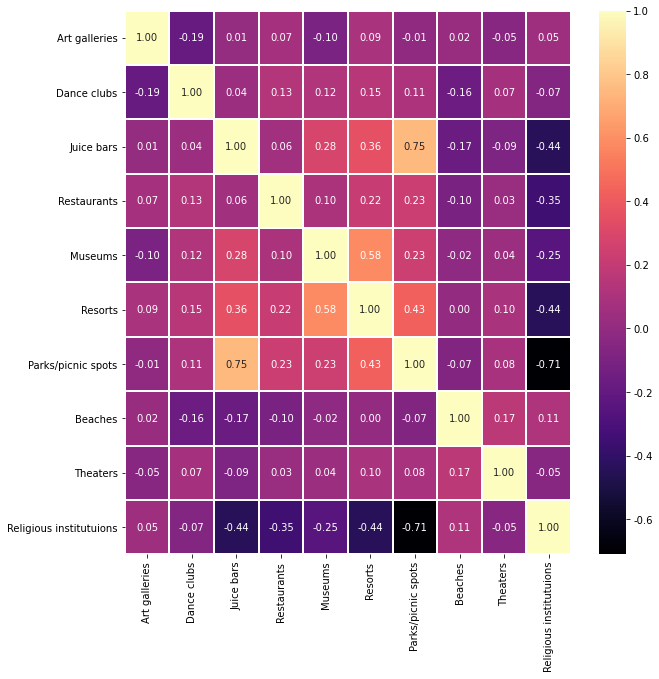

In [11]:
fig, axes = plt.subplots(figsize = (10, 10))
plt.xticks(rotation=90)
plt.yticks(rotation=90)
sns.heatmap(df_pre.corr(method = 'pearson'), ax = axes, annot = True, fmt = '.2f', linewidths = 0.03, cmap="magma")

<AxesSubplot:>

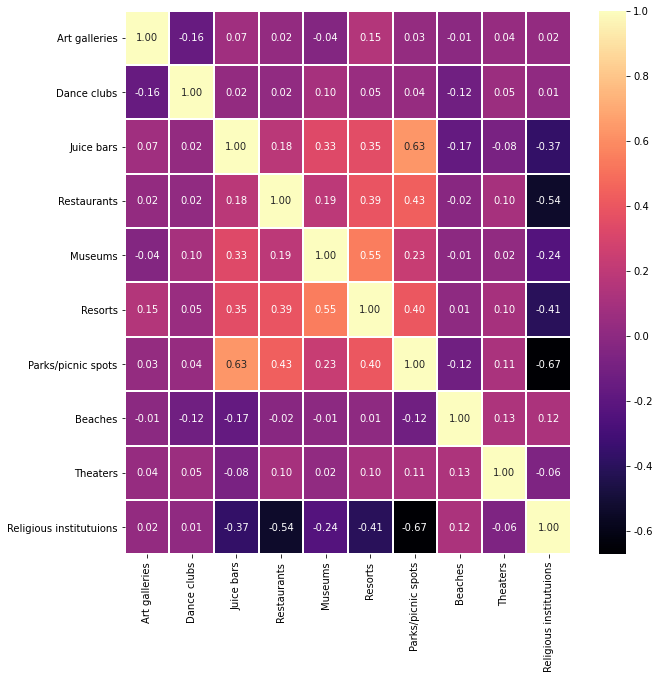

In [12]:
fig, axes = plt.subplots(figsize = (10, 10))
plt.xticks(rotation=90)
plt.yticks(rotation=90)
sns.heatmap(df_pre_clean.corr(method = 'pearson'), ax = axes, annot = True, fmt = '.2f', linewidths = 0.03, cmap="magma")

<AxesSubplot:>

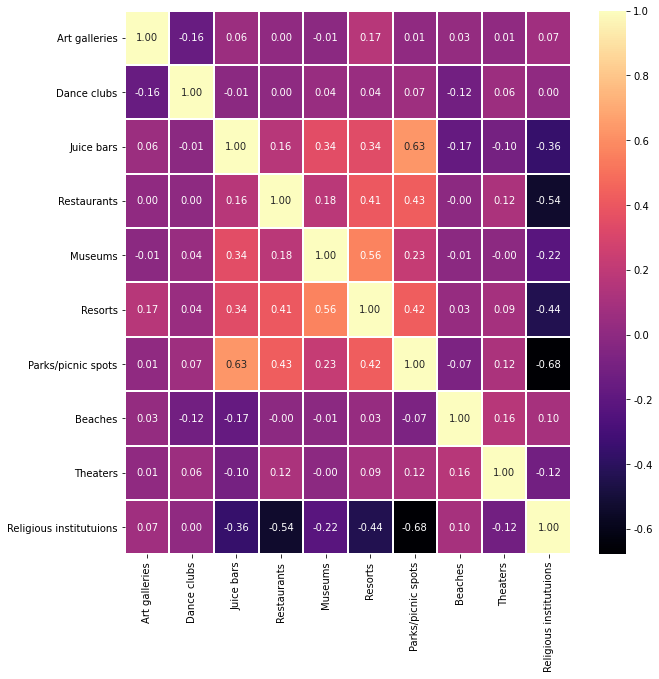

In [13]:
fig, axes = plt.subplots(figsize = (10, 10))
plt.xticks(rotation=90)
plt.yticks(rotation=90)
sns.heatmap(df_pre_clean_witoutOutliers.corr(method = 'pearson'), ax = axes, annot = True, fmt = '.2f', linewidths = 0.03, cmap="magma")

From the correlation figures, we can see that there are just a little changes on different DataFrames, which means the linear correlation of each paired attributes were not affect too much after data clean. Besides, the strongest linear correlation is Juice bars-Parks/picnic spots. In the three figures, they are 0.75, 0.63 and 0.63. These figures also show us, there are good linear correlations between Juice bars and Parks/picnic spots, Resorts, Museums. Also becaues the std of Juice bars is the biggest one. Therefore, I decide to use the Jucie bars as our label attribute for the classification model. 

# **PCA**
**PrinciplaComponent Analysis** is a technique used for finding a low-dimensional representation of some data that captures as much information as possible. The idea is that each of s series of n observations lives in a p-dimensional space, but not all of these dimensions are equally interesting. PCA finds dimensions that are linear combination of the original p features. The formula is fellowing:

$Z_{1}=\phi_{11} X_{1}+\phi_{21} X_{2}+\ldots+\phi_{p 1} X_{p}$

The PCA try to solve the following optimization problem:

$\max \text { imize } \frac{1}{n} \sum_{i=1}^{n}\left(\sum_{j=1}^{p} \phi_{j_{1}} x_{i j}\right) \text { subject to } \sum_{j=1}^{p} \phi_{j_{1}=1}^{2}$

There are two benefits for applying PCA , firstly it reduces the curse of dimensionality and it makes the data uncorrelated and a lot of algorithms work better if the data is uncorrelated. We run the PCA algorithm on our datasets to visualize our dataset and better understand the variance . At first we check the variance achieved by 2 principal components and the 3 principal components and later perform a plot to better understand the number of principal components needed.

**The reason I use this model:** As for our dataset, I used the PCA to reduce the demensions, and do not loss too much information. Besides, if the top-2 or top-3 dimensions bring above 80% information, we can visiualize these high dimensions dataset.

## **2.1 - Importing of usefull library**

In [14]:
from sklearn.decomposition import PCA

## **2.2 - Preparing Data for PCA**
We now copy the data from DataFrame df_pre, and pick out our the labeled atrribute from the dataset. So that we can keep this attribute after the PCA.

Besides, in order to reduce the PCA fitting time, I used the Z-score method to normalizet the dataset. 

In [15]:
df_PCA = df_pre.copy()
df_x = df_PCA[[i for i in df_PCA.columns if LABLE not in i ]]
df_y = df_PCA[[i for i in df_PCA.columns if LABLE in i ]]
df_x_normed = (df_x - df_x.mean())/df_x.std()
df_x_normed.head()

,Art galleries,Dance clubs,Restaurants,Museums,Resorts,Parks/picnic spots,Beaches,Theaters,Religious institutuions
0,0.112587,0.935409,0.312800,-0.319445,1.069623,1.158066,-0.327705,0.687167,-1.179988
1,0.387890,1.771739,0.384297,1.097925,2.478235,3.714156,-1.491295,0.796867,-1.491147
2,0.999675,-1.155415,-0.008937,-1.599650,-0.561402,-0.119980,-0.254981,-0.711513,-0.931062
3,-1.355697,0.935409,0.134057,-1.096712,-0.598471,-0.119980,0.908609,0.001539,0.189108
4,-1.172161,-0.319085,0.134057,1.372255,0.328248,-0.119980,-0.400429,-1.068040,-0.806599


## **2.3 - PCA fit**
In order to get all the components' information ration, I set the parameter n_components = 9.

In [16]:
pca = PCA(n_components=9, random_state=420)
df_x_pca = pca.fit(df_x_normed)
print(pca.explained_variance_ratio_)

[0.28315662 0.13717293 0.13422093 0.11405802 0.10265683 0.08486208
 0.07648012 0.03776408 0.0296284 ]


## **2.4 - Visuliziation Result**
I draw a barplot of the variance_ratio of each components.  And also draw the lineplot to show the relation ship between information ration and the number of used components. 

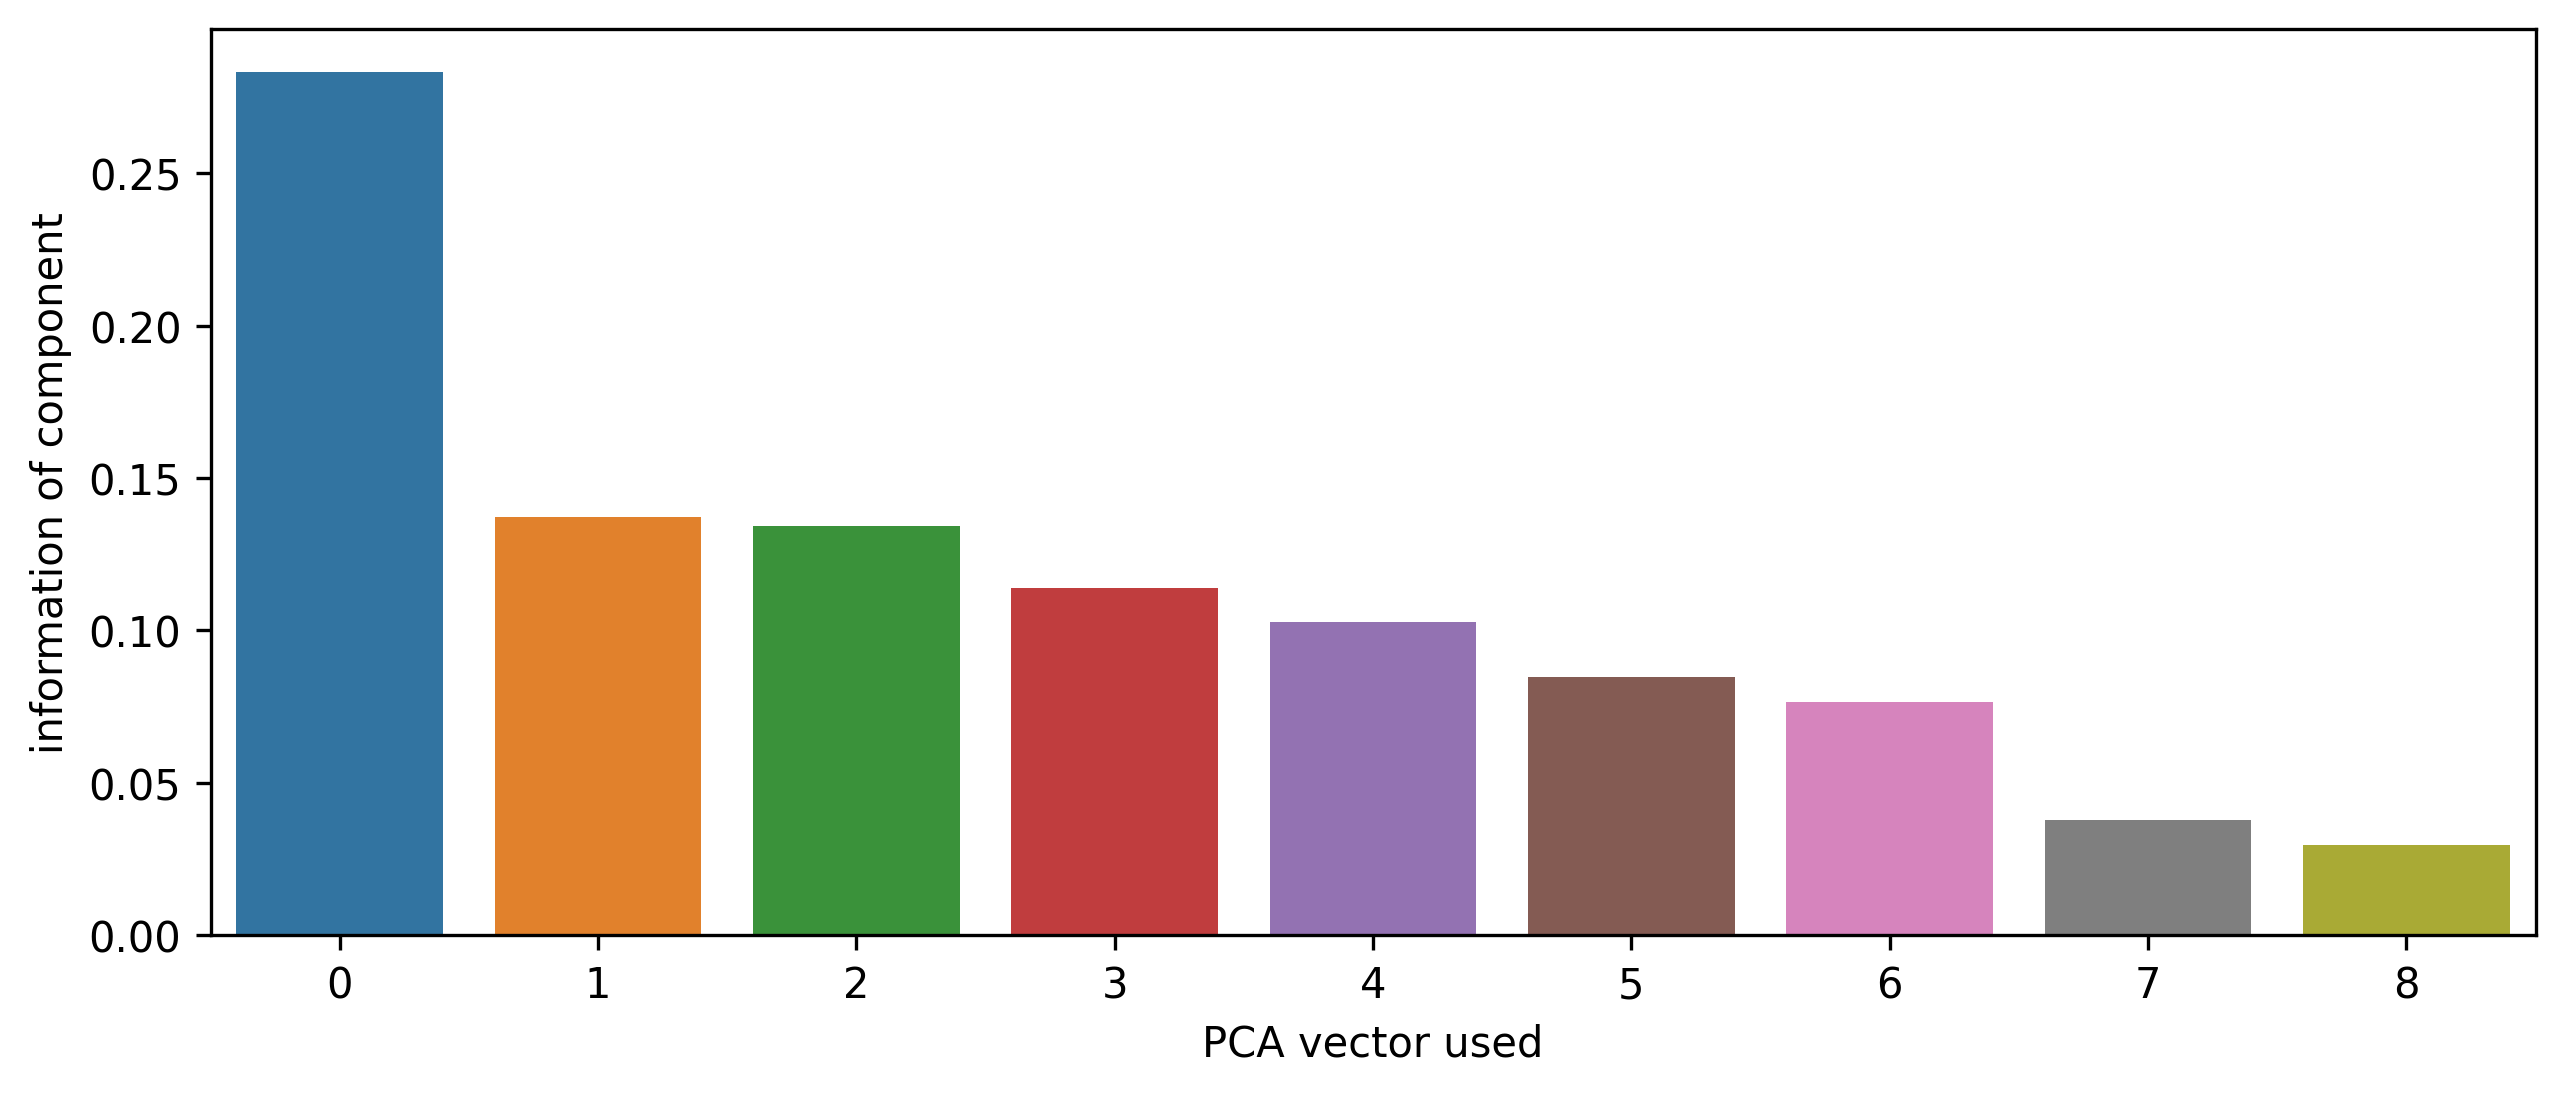

In [17]:
y_information_gain = np.cumsum(pca.explained_variance_ratio_)
data = pd.DataFrame.from_dict({"information of component" : pca.explained_variance_ratio_[0:9],"PCA vector used" : range(y_information_gain.__len__())[0:9]})
plt.figure(figsize=(10,4), dpi=300)
sns.barplot(data = data, x='PCA vector used', y = 'information of component')
plt.show()

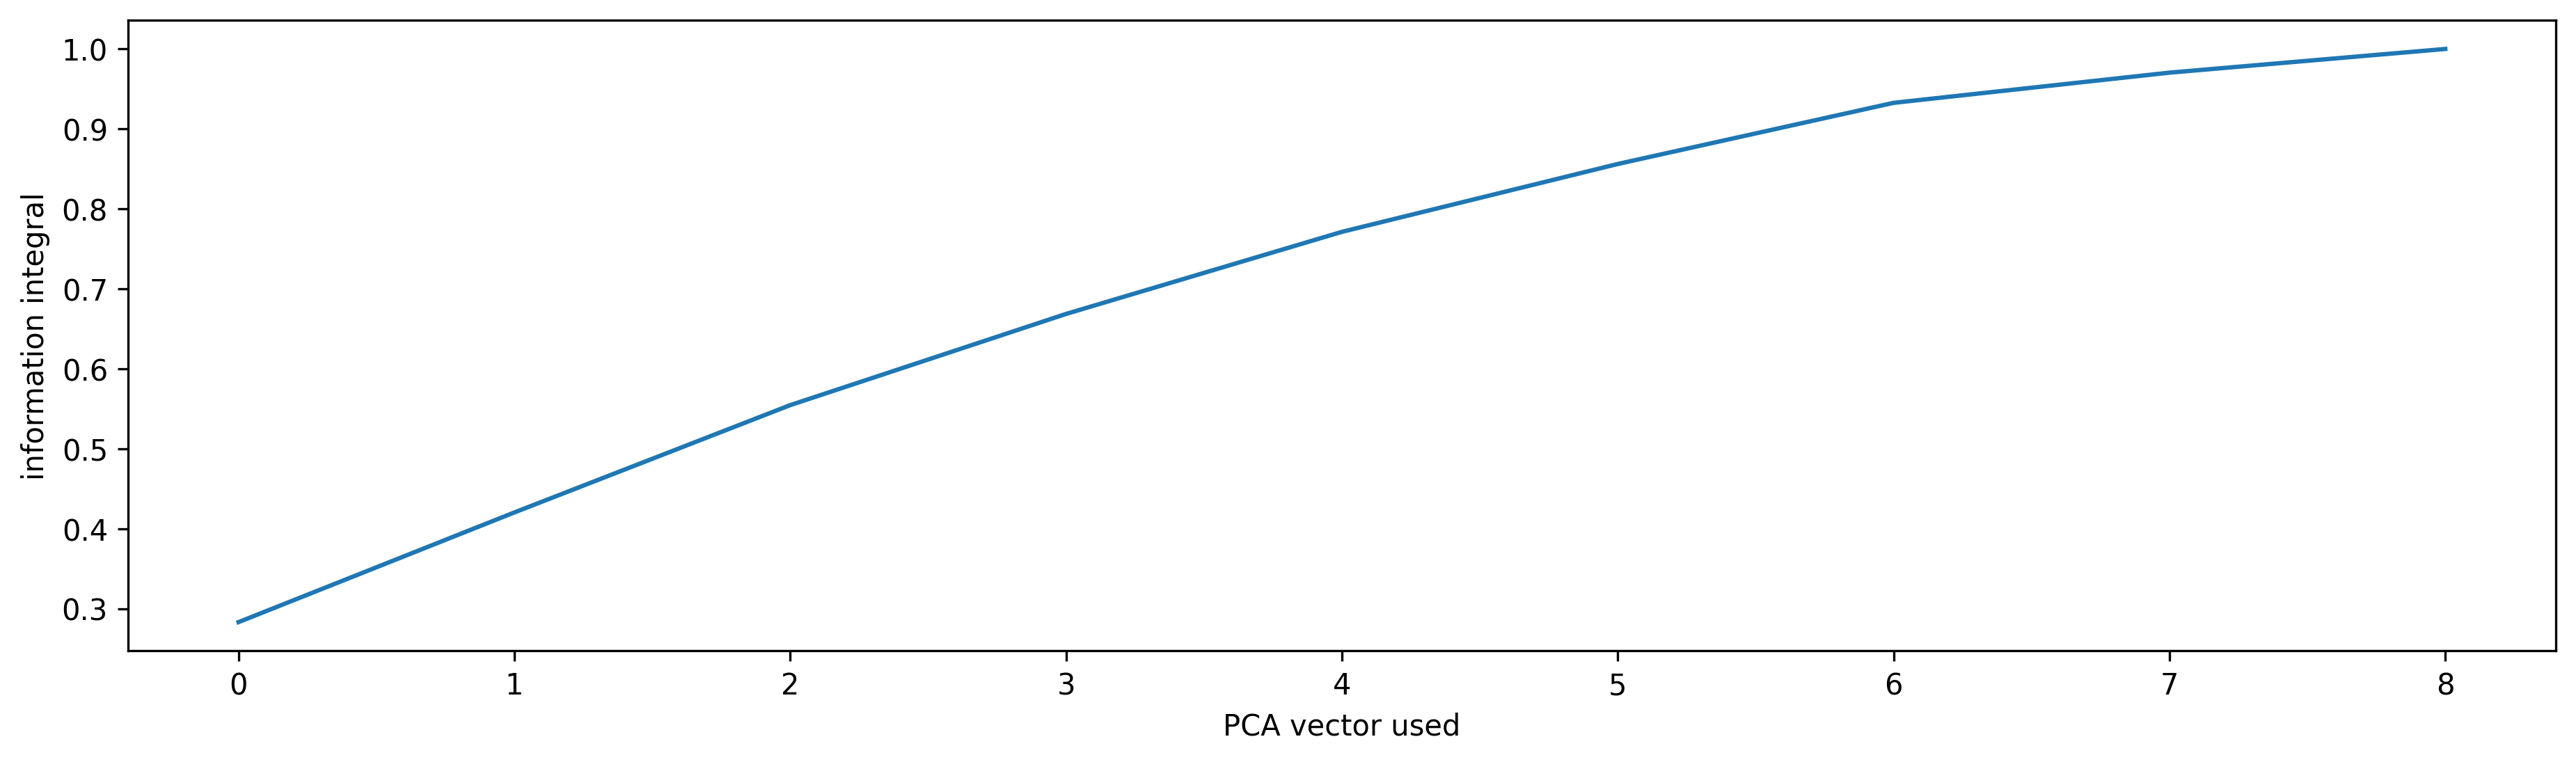

In [18]:
plt.figure(figsize=(15,4), dpi=300)
data = pd.DataFrame.from_dict({"information integral" : y_information_gain,"PCA vector used" : range(y_information_gain.__len__())})
sns.lineplot(data = data, x='PCA vector used', y = 'information integral')
plt.show()

From these two plots, we know that the top-1 component just bring about 28% information, and the top-3 components just bring about 60% information. That does not statisfy our 80%. Only top-5 components bring about 80% information of our dataset. However, that is not very helpful for reducing our model fitting time.

In summary, the top-3 components just bring 60% information. If we use PCA to reduce the dimensions from 9 to 3, it will lost lots of information. It may does can reduce the fitting time, but it also harm our models' accuracy. And if we use the PCA to reduce the dimensions form 9 to 5, it do will bring enough information. But it will lose a little accuracy, and it will not reduce too much fitting time. The most import thing, if we use PCA, we will do not know the relationship betweent Juice bars and other 9 attributes.

According to these reasons, I decided to use the full attributes for our models.

# **Cluster Algorithm**
Because there is no label on the raw dataset, I decide to use the Cluseter Model to find the some useful information of the dataset. If the model cluster the dataset very well, we can add a new label attribute on our dataset. In that case, we do not need to choose a attribute as our label attribut. I select two cluster models to cluster our dataset which are:
* Kmeans
* DBSCAN

## **Kmeans**

K-means clustering algorithm is an iterative clustering analysis algorithm. 
Given a set of observations (x1, x2, ..., xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, ..., Sk} so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance). Formally, the objective is to find:

$\underset{\mathbf{S}}{\arg \min } \sum_{i=1}^{k} \sum_{\mathbf{x} \in S_{i}}\left\|\mathbf{x}-\boldsymbol{\mu}_{i}\right\|^{2}$

The computing steps are:
1. Random select k samples to from the dataset, set them as the cluster centers
2. Computing the distance between data and cluster centers, and assign the data to a cluster
3. Recompute the k cluster centers, according to the data that were assigned to a cluster

Repeat the step 1-3, until the K cluster centers do not change any more

**The reason I use this model:** Kmeans is the classic cluster model, even it perform bad on some kind dataset, but I still decided to use it on our dataset.

### **3.1.1 - Import Libraries**

* KMeans: I use it to cluster our dataset

* silhouetter_score: It is a kind measure tools for cluster model. So I use it to measure the model performance. The score range is [-1, 1], the score is more close to the 1, its perfomance is more better
* silhouetter_samples: This method will return all the Contour factors of each row. I used this to get the contour factors to draw the bar of each cluster.
* cm: I use it to set the colors of the barplot

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm 

### **3.1.2 - Kmeans Data Preparing**

In [20]:
df_pre_kmeans = df_pre.copy()

### **3.1.3 Show the Result**

In this section, I draw 8 barplot and 1 lineplot to visiualze the result.

The max score is 0.300883545621953, the cluster number is 2


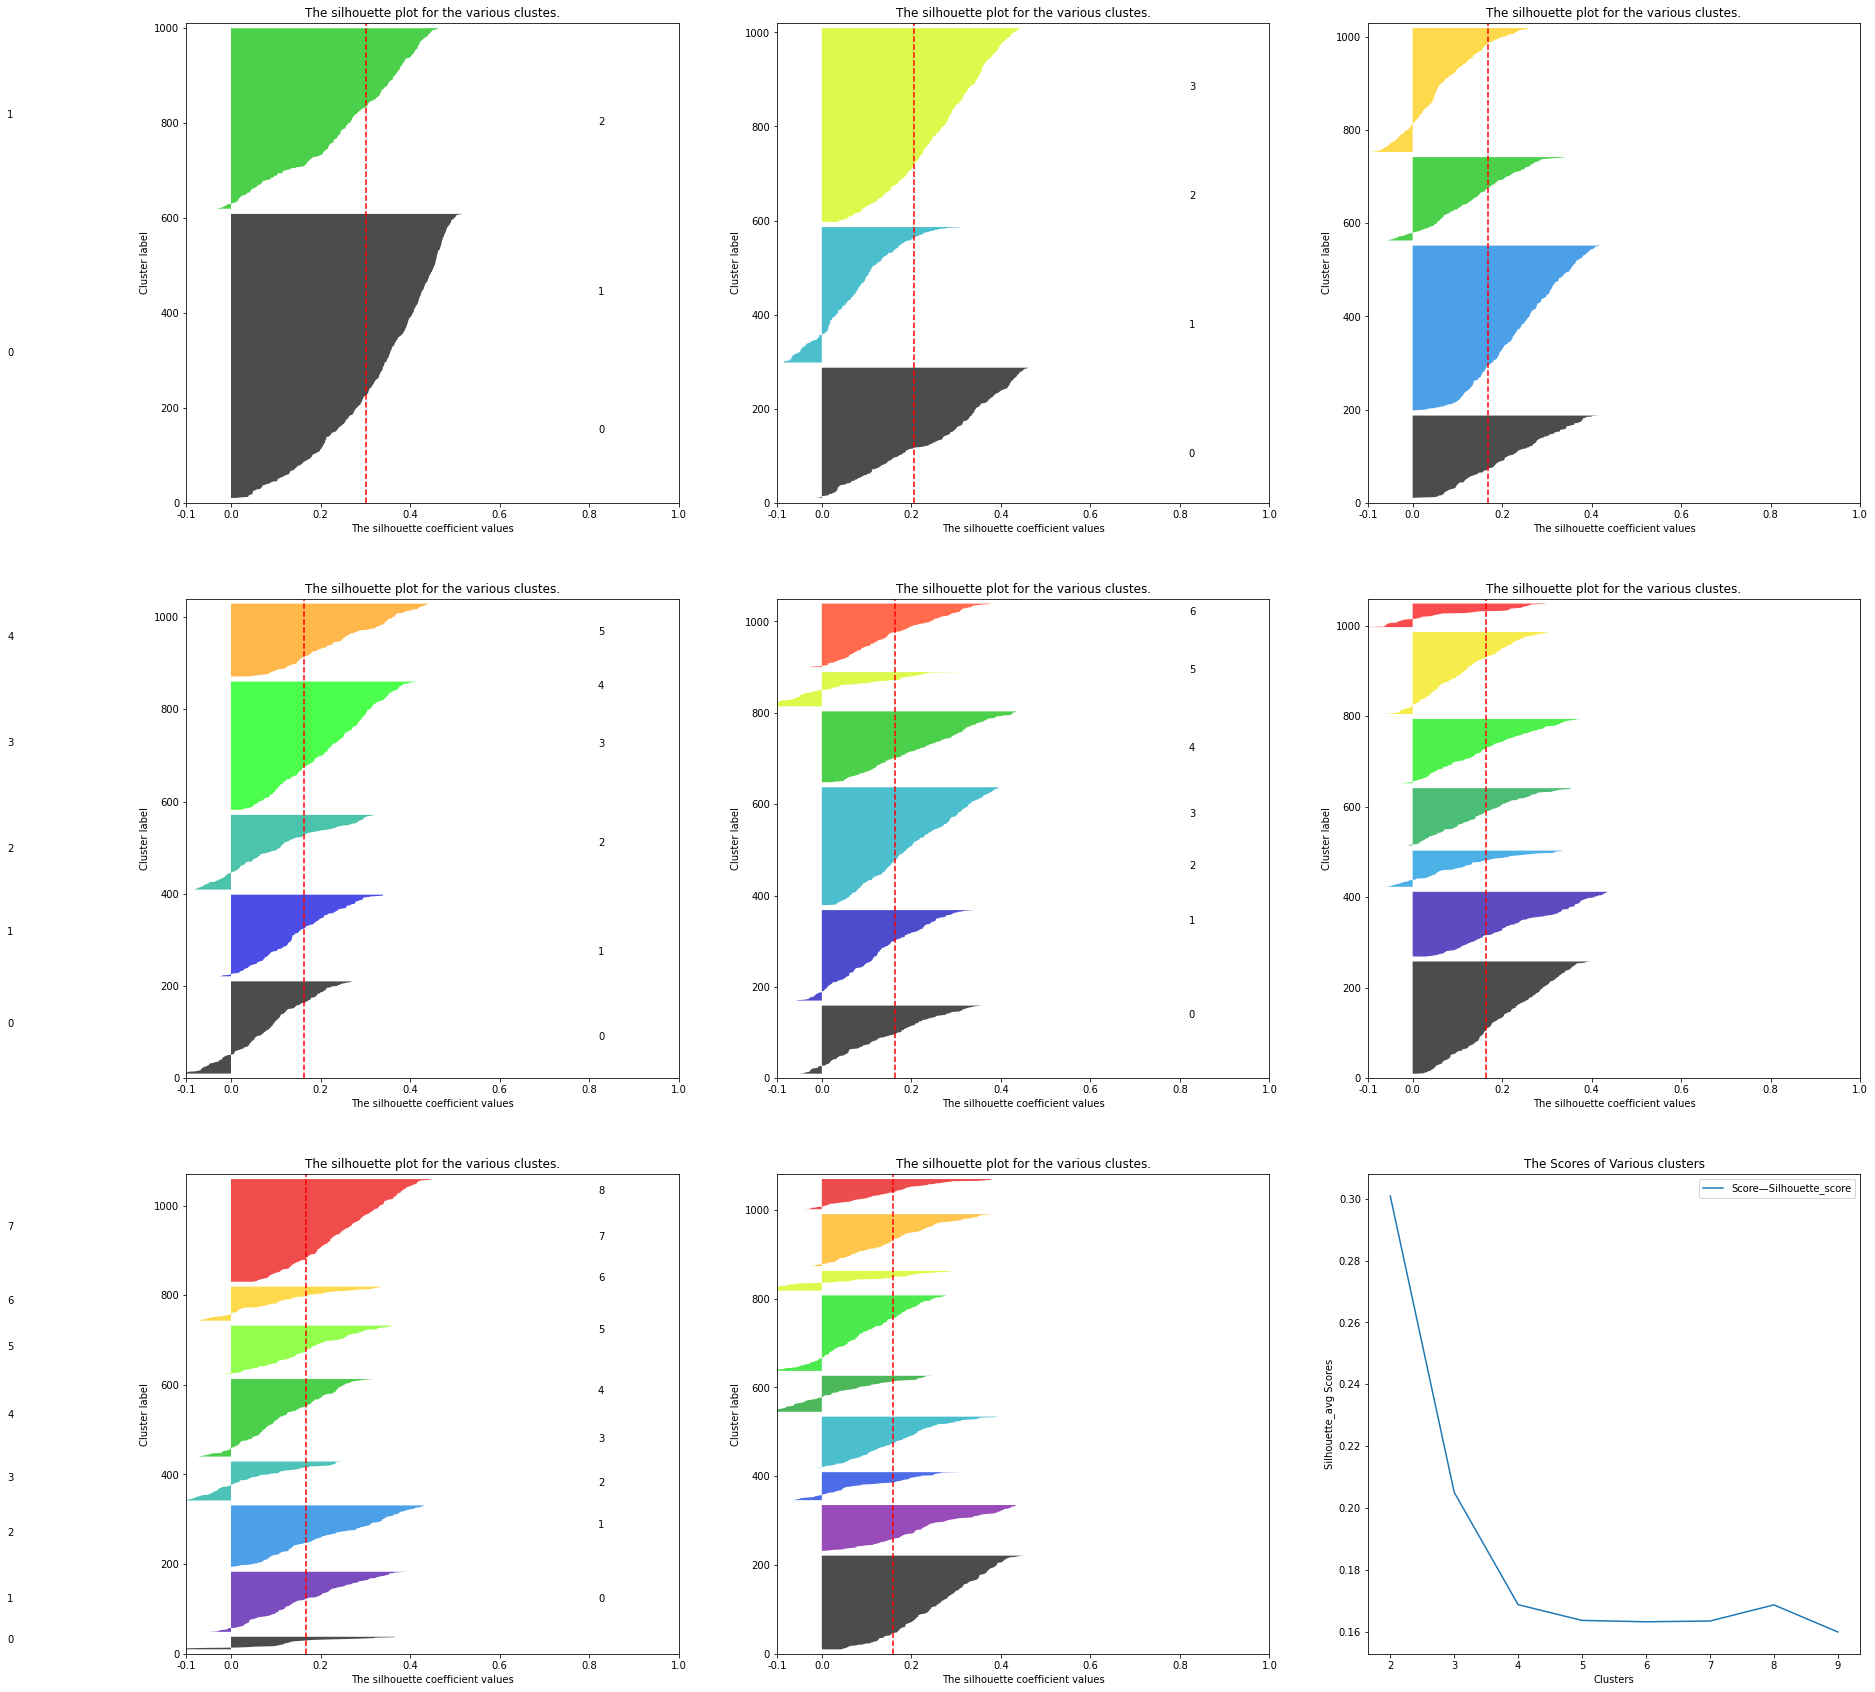

In [21]:

fig,ax1 = plt.subplots(3, 3)
ax1 = ax1.flatten()
fig.set_size_inches(30, 30)
score = []
clusterNum = [2, 3, 4, 5, 6, 7, 8, 9]
for n_clusters in clusterNum:

    clusterer = KMeans(n_clusters = n_clusters, random_state = 10).fit(df_pre_kmeans)
    cluster_labels = clusterer.labels_

    silhouette_avg = silhouette_score(df_pre_kmeans, cluster_labels)
    score.append(silhouette_avg)
#     print("For n_clusters = ", n_clusters," The average silhouette_score is : ",silhouette_avg)

    sample_silhouette_values = silhouette_samples(df_pre_kmeans, cluster_labels)

    ax1[n_clusters-2].set_xlim([-0.1, 1])
    ax1[n_clusters-2].set_ylim([0, df.shape[0] + (n_clusters +1)*10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i)/n_clusters)

        ax1[n_clusters-2].fill_betweenx(np.arange(y_lower, y_upper),
                         ith_cluster_silhouette_values,
                         facecolor = color,
                         alpha = 0.7)

        ax1[n_clusters-2].text(-0.5, y_lower + 0.5*size_cluster_i, str(i))

        y_lower = y_upper + 10
    ax1[n_clusters-2].set_title("The silhouette plot for the various clustes.")
    ax1[n_clusters-2].set_xlabel("The silhouette coefficient values")
    ax1[n_clusters-2].set_ylabel("Cluster label")

    # Add a dot line, the countor factor mean of the whole dataset, to the fig1
    ax1[n_clusters-2].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1[n_clusters-2].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
print(f"The max score is {max(score)}, the cluster number is {[*clusterNum][score.index(max(score))]}")
ax1[-1].set_title(f"The Scores of Various clusters")
ax1[-1].set_xlabel("Clusters")
ax1[-1].set_ylabel("Silhouette_avg Scores")
# ax1[-1].xticks(range(minDeep, maxDeep))
ax1[-1].plot(clusterNum, score, label='Score—Silhouette_score')
ax1[-1].legend()
plt.show()

From these plots, we can see that the biggest score is 0.300883545621953 which parameter n_clusters = 2. The score is too low As for the last plot, the score is so low that we can not use its result as our new label attribute. These plots also show us that, the score decreases with the increase of n_clusters, showing in the last plot.

In summary, we can reasonablely conclude that:
* The model is not suitable for this data set 
* Or the data set can not be devided into any parts.

## **DBSCAN**
It is a density-based clustering non-parametric algorithm: given a set of points in some space, it groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions (whose nearest neighbors are too far away). DBSCAN is one of the most common clustering algorithms and also most cited in scientific literature.

The DBSCAN algorithm can be abstracted into the following steps:

* Find the points in the **ε (eps)** neighborhood of every point, and identify the core points with more than **minPts** neighbors.
* Find the connected components of core points on the neighbor graph, ignoring all non-core points.
* Assign each non-core point to a nearby cluster if the cluster is an ε (eps) neighbor, otherwise assign it to noise.

**The reason I use this model:** 
* The Kmeans does not perform well on our dataset, I try a new kind cluster model.
* The DBSCAN perform very well on lots of kind of dataset, you can learn more from [this](https://scikit-learn.org/stable/modules/clustering.html)

## **3.2.1 - Import libraries**
* DBSCAN: I use this to cluster our dataset
* silhouetter_samples: same to the kmeans
* silhouetter_scoer: same to the kmeans
* cm: same to the kmeans

In [22]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm #colormap

# DataSet processing
df_DBSCAN = df_pre.copy()

### **3.2.2 - Tune the model**
Because there are too many pairs for parameter eps and min_samples, and in order get to the best performance, I choose to finely search the parameters. Besides, these codes will print the best parameters in the search space.

The max score is 0.5129418585737335, the model is 2.0-19


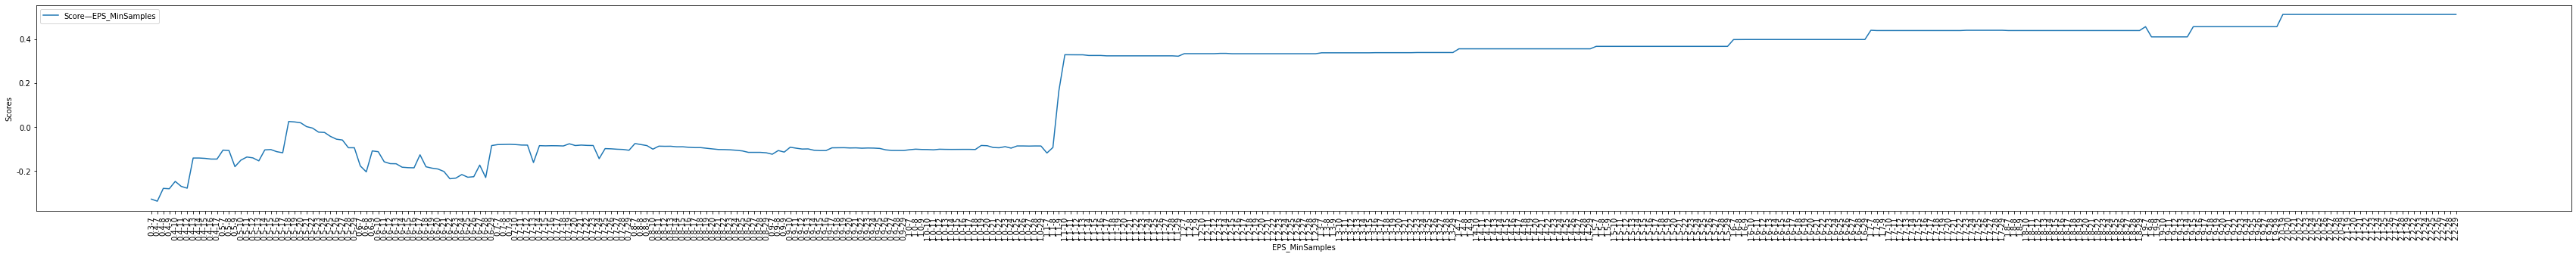

In [23]:
X = df_DBSCAN.copy()
clusterer = DBSCAN(eps=0.6, min_samples=6).fit(X)
epss = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4]
min_samples = range(7, 30)
score = []
eps_sample = []
for i in epss:
    for j in min_samples:
        clusterer = DBSCAN(eps=i, min_samples=j).fit(X)
        labels = clusterer.labels_ 
        X['cluster_db'] = labels  
        X.sort_values('cluster_db')
        silhouette_avg = 0
        if len(X["cluster_db"].value_counts())>=2:
            silhouette_avg = silhouette_score(df_DBSCAN, labels)
            score.append(silhouette_avg)
            string = str(i)+ "-" + str(j)
            eps_sample.append(string)
#         print("EPS:", i, "Min_Samples: ", j,"n_clusters = ", len(X["cluster_db"].value_counts())," silhouette_score is : ",silhouette_avg)
print(f"The max score is {max(score)}, the model is {[*eps_sample][score.index(max(score))]}")
plt.figure(figsize=(60, 5))
plt.xticks(rotation=90)
plt.plot(eps_sample, score, label='Score—EPS_MinSamples')
plt.xlabel("EPS_MinSamples")
plt.ylabel("Scores")
# plt.axhline(y=0, color="red", linestyle="--")
plt.legend()
plt.show()

From the plot, we can see that the best parameters for the model is : eps=2.0 and min_samples = 19

## **3.2.3 - Show the Result**
In this section, according to the last section, I selected some pairs of eps and min_samples. And these codes will print the pair, number of clusters and scores. 

In order to better analyze the dataset, I draw 8 barplots and 1 linear plot.

For eps =  [1.1, 10] For n_clusters =  2  The average silhouette_score is :  0.3598352598532956
For eps =  [1.2, 22] For n_clusters =  2  The average silhouette_score is :  0.36462216549004706
For eps =  [1.4, 22] For n_clusters =  2  The average silhouette_score is :  0.4241230869558367
For eps =  [1.5, 22] For n_clusters =  2  The average silhouette_score is :  0.43378800250464244
For eps =  [1.6, 22] For n_clusters =  2  The average silhouette_score is :  0.44076314857043747
For eps =  [1.8, 22] For n_clusters =  2  The average silhouette_score is :  0.4720361565863236
For eps =  [1.9, 22] For n_clusters =  2  The average silhouette_score is :  0.4720361565863236
For eps =  [2.0, 19] For n_clusters =  2  The average silhouette_score is :  0.5129418585737335


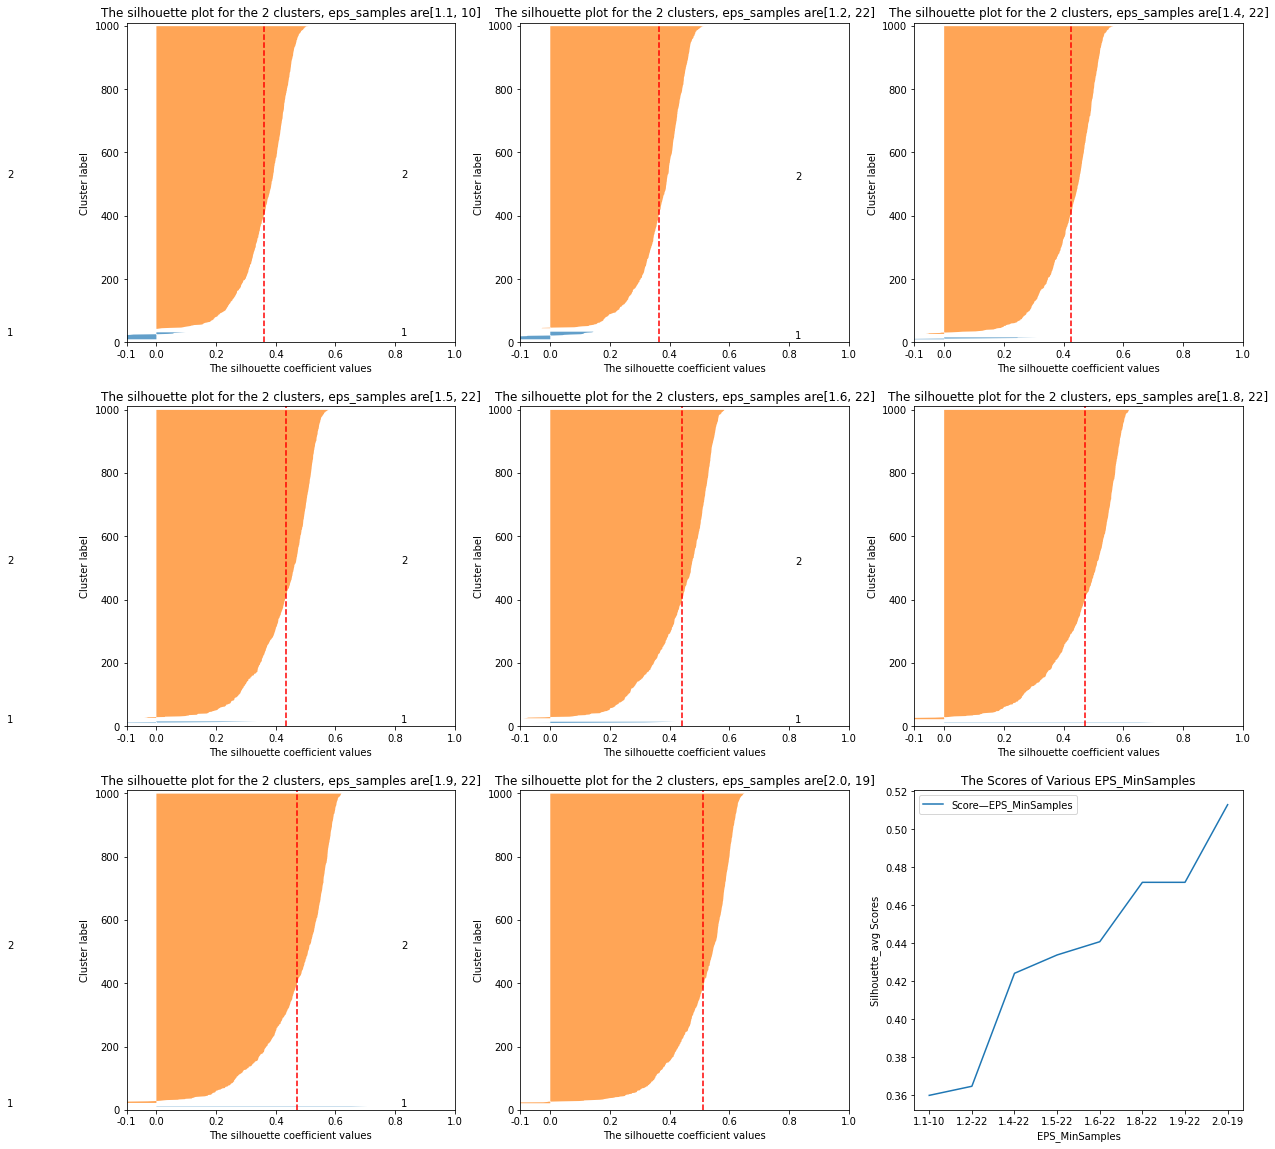

In [24]:
# TODO: Choose some labels
fig,ax1 = plt.subplots(3, 3)
ax1 = ax1.flatten()

# Setting the fig size
fig.set_size_inches(20, 20)
eps_MinSam = [[1.1, 10], [1.2, 22], [1.4, 22], [1.5, 22], [1.6, 22], [1.8, 22], [1.9, 22], [2.0, 19]]
score = []
eps_sample = []
for index, val in enumerate(eps_MinSam):
    # Start Modeling 
    X = df_DBSCAN.copy()
    clusterer = DBSCAN(eps=val[0], min_samples=val[1]).fit(X)
    cluster_labels = clusterer.labels_
    X['cluster_db'] = cluster_labels
    n_clusters = len(X["cluster_db"].value_counts())

    silhouette_avg = silhouette_score(df_DBSCAN, cluster_labels)
    print("For eps = ", val, "For n_clusters = ", n_clusters," The average silhouette_score is : ",silhouette_avg)
    
    score.append(silhouette_avg)
    string = str(val[0])+ "-" + str(val[1])
    eps_sample.append(string)
    
    sample_silhouette_values = silhouette_samples(df_DBSCAN, cluster_labels)
    
    ax1[index].set_xlim([-0.1, 1])
    
    ax1[index].set_ylim([0, df.shape[0] + (n_clusters +1)*10])
    y_lower = 10

    # Second, executing the following codes for each clusters
    for i in range(-1, n_clusters-1):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
#         print("The ", i, "th cluster number is: ", size_cluster_i)
        
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i)/n_clusters)

#         print("y_lower: ", y_lower, "y_upper: ", y_upper)
        ax1[index].fill_betweenx(np.arange(y_lower, y_upper),
                         ith_cluster_silhouette_values,
#                          facecolor = color,
                         alpha = 0.7)

        ax1[index].text(-0.5, y_lower + 0.5*size_cluster_i, str(i+2))

        y_lower = y_upper + 10
    ax1[index].set_title(f"The silhouette plot for the {n_clusters} clusters, eps_samples are{val}")
    ax1[index].set_xlabel("The silhouette coefficient values")
    ax1[index].set_ylabel("Cluster label")

    # Add a dot line, the countor factor mean of the whole dataset, to the fig1
    ax1[index].axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1[index].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax1[-1].set_title(f"The Scores of Various EPS_MinSamples")
ax1[-1].set_xlabel("EPS_MinSamples")
ax1[-1].set_ylabel("Silhouette_avg Scores")
# ax1[-1].xticks(range(minDeep, maxDeep))
ax1[-1].plot(eps_sample, score, label='Score—EPS_MinSamples')
ax1[-1].legend()
plt.show()

* From the barplots, we can know that the data distribution is very unevenm, only several data belongs to the first cluster and almost all the data belongs to the second cluster. Besides, the scores is so low that we can not use these results as our dataset new label attrubute.
* From the printed information and linear plot, it shows us that the score increases with the increases of eps. However, we can know, from last section's linar plot, that the score is the biggest in the search space and it will not increase any more.

In summary, reference the Kmeans results, I can resonablely conclue that:
* Our dataset can not divided into several parts.
* We can not use this result as our new label attribute on ourdata set 

Because of these reasons which mentioned above, I decide to use the "Juice bars" as our label attirbute for models.

# **Regression**

Because the data of the dataset is continuous data, so we can use the regression model to predict the labeled attribute value.

## **Linear Regression**
Linear regression model is a mathematical regression modelm, which is used to determine the correlation between variables.

The formula is fellowing:

$y_{i}=\beta_{0}+\beta_{1} x_{i 1}+\cdots+\beta_{p} x_{i p}+\varepsilon_{i}=\mathbf{x}_{i}^{\top} \boldsymbol{\beta}+\varepsilon_{i}, \quad i=1, \ldots, n$

**The reason I use this model:** 
* The data of our raw dataset is continuously.
* There is no label attribute in our raw dataset.
* The linear model is very suitable for our raw dataset

## **4.1.1 - Import libraies**
* LinearRegression: API of linear model, I used it to train our linear model and predict the "Juice bars" rates.
* train_test_split: It is used to devide the dataset into train set and test set by different rotion
* mean_squared_error: It is a measure tool which is used to measure the linear model's performance. The score is more close to the 1, the model performance is more better.

In [25]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

### **4.1.2 - Pre-process the dataset**
* Making a DataFrame for the linear regression model
* Split these two dataset into train set and test set
* Recover the index of these data sets

In [26]:
df_pre_LR = df_pre.copy()
df_pre_LR_X = df_pre_LR[[i for i in df_pre_LR.columns if LABLE not in i ]]
df_pre_LR_Y = df_pre_LR[[i for i in df_pre_LR.columns if LABLE in i ]]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_pre_LR_X, df_pre_LR_Y, test_size = 0.3, random_state = 420)

# Recover the index
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
for i in [Ytrain, Ytest]:
    i.index = range(i.shape[0])

### **4.1.3 - Show Result**
In section, I will do the fellowing tasks:
* fitting the model
* predicting the "Juice bars" rates by the trained model
* visiulizing the results

In [27]:
reg = LR().fit(Xtrain, Ytrain)

yhat = reg.predict(Xtest)

r2 = reg.score(Xtest, Ytest)
print(r2)

0.624883918115901


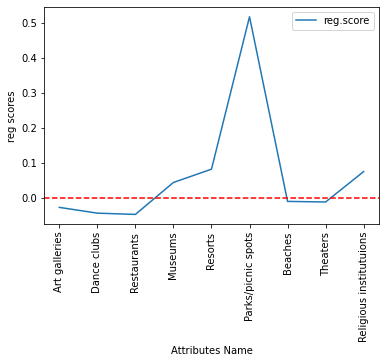

In [28]:
r2 = []
for index, col in enumerate(Xtrain.keys()[0:]):
    testXtrain = Xtrain[col].values.reshape(-1,1)
    reg1 = LR().fit(testXtrain, Ytrain)
    testXtest = Xtest[col].values.reshape(-1,1)
    r2.append(reg1.score(testXtest, Ytest))
# plt.figure(figsize = (10, 10))
plt.xticks(rotation=90)
plt.plot(Xtrain.keys()[0:], r2, label='reg.score')
plt.xlabel("Attributes Name")
plt.ylabel("reg scores")
plt.axhline(y=0, color="red", linestyle="--")
plt.legend()
plt.show()

In this section, I draw the lineplot to show the $R^2$ score on different attributes.

From the plot, we can find there is good linear relationship betweent Jucie bars and Parks/picnic spots

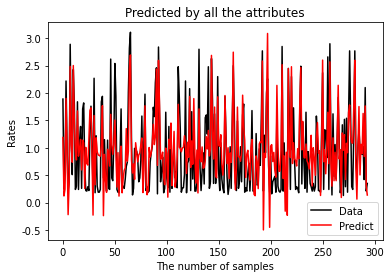

In [29]:
plt.plot(range(len(Ytest)), Ytest.values, c= "black", label="Data")
plt.plot(range(len(yhat)),yhat, c= "red", label="Predict")
plt.title("Predicted by all the attributes")
plt.xlabel("The number of samples")
plt.ylabel("Rates")
plt.legend()
plt.show()

* From the printed information, we can know that the $R^2$ socer is 0.624883918115901, which means the LR model perform not bad on our dataset.
* From the first plot, it shows us that there is good linear relationship betweent Jucie bars and Parks/picnic spots.
* From the last plot, we can know that the predict values are very samilarly to our real values, whic also means the LR model perform not bad on our dataset.

In summary, because our real y-target values are continuously, it is hard for the model to predict the accuracy value. Therefore, we can only use the MSE to measure the LR model's performance. The last plot shows that the LR model perform well on our dataset 


# **Classification**

The one of the main purpose of this report is to build a model which classifies Juice bars' rates. Hence I have used various classification models :

* Logistic Regression
* Decision Tree
* Random Forest
* Support Vector Machine
* K-Nearest Neighbours
* Bayes

To measure the performance of the trained models were used some common metric:

* Confusion Matrix
* Accurracy $\text { Accurracy }=\frac{T P+T N}{(T P+T N+F P+F N)}$
* Precision $\text { Precision }=\frac{T P}{T P+F P}$
* Recall    $\text { Recall }=\frac{T P}{T P+F N}$
* F1        $F 1=2 \times \frac{(\text { Recall } \times \text { Precision })}{(\text { Recall }+\text { Precision })}$

The **Confusion Matrix** is a table that is used to describe the performance of a classifier on a set of test data for which the true values are known.

Some of the basic terms are:

* **True positives (TP):** These are cases in which we predicted yes, and they are yes.
* **True negatives (TN):** We predicted no, and they.
* **False positives (FP):** We predicted yes, but they are no
* **False negatives (FN):** We predicted no, but they are yes

Define two global variables to store the socres and fitting time of different classification models

In [30]:
# AllModelRunTime = pd.DataFrame(columns = ['Model', 'RunTime'])
# AllModelScore = pd.DataFrame(columns = ['Model', 'Accurracy', 'Percision', 'Recall', 'F1'])
AllModelScore = []
AllModelRunTime = []

## **Logistic Regression**

Logistic regression is a classification algorithm used to assign observations to a discrete set of classes. Unlike linear regression which outputs continuous number values, logistic regression transforms its output using the logistic sigmoid function to return a probability value which can then be mapped to two or more discrete classes

The logistic function is defined as :

$S(z)=\frac{1}{1+e^{-z}}$


**The reason I use this model:** 
* There are not too many requirements for the data, not like linear regression.
* This model performs very well on linear dataset.
* This model's compute time very less.
* Because LR model performs well on our dataset, and the logistic regression has a deep relationship with LR.

### **5.1.1 - Importing of usefull library**
* LogisticRegression: API for Logistic Regression model
* train_test_split: same as LR model section
* confusion_matrix: To show the classification errors
* ccuracy_score, recall_score, precision_score, f1_score: They are used to measure the model's performande
* time: I use it to compute the fitting time of models

In [31]:
from sklearn.linear_model import LogisticRegression as LoRe
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from time import time

### **5.1.2 - Dataset**
* Making a DataFrame for the this model
* Split these two dataset into train set and test set
* Map the "Juice bars" value from continuous type to dicrete type, so that classification models can fit.
* Recover the index of these data sets

In [32]:
df_LoRe = df_pre.copy()
df_LoRe_X = df_pre_LR[[i for i in df_LoRe.columns if LABLE not in i ]]
df_LoRe_Y = df_pre_LR[[i for i in df_LoRe.columns if LABLE in i ]]

np_LoRe_Y = np.array(df_LoRe_Y)
np_LoRe_Y = np.around(np_LoRe_Y, decimals=0)

df_LoRe_Y = pd.DataFrame(np_LoRe_Y, columns=[LABLE], dtype = int)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_LoRe_X, df_LoRe_Y, test_size = 0.3, random_state = 420)
# Recover the index
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
for i in [Ytrain, Ytest]:
    i.index = range(i.shape[0])

### **5.1.3 - Tune the model**
In order to get the best parameter c, I set a search space for c and set parameters multil_class = "ovr", solver="newton-cg", max_iter=1000.

C is the inverse of the regularization. For small values of C, we increase the regularization strength which will create simple models which uderfit the data. For big values of C, we low the power of regularization which implies the model is allowed to increase its complexity, and therefore, overfit the data.

0.5374149659863946 The C index is  33.10000000000001


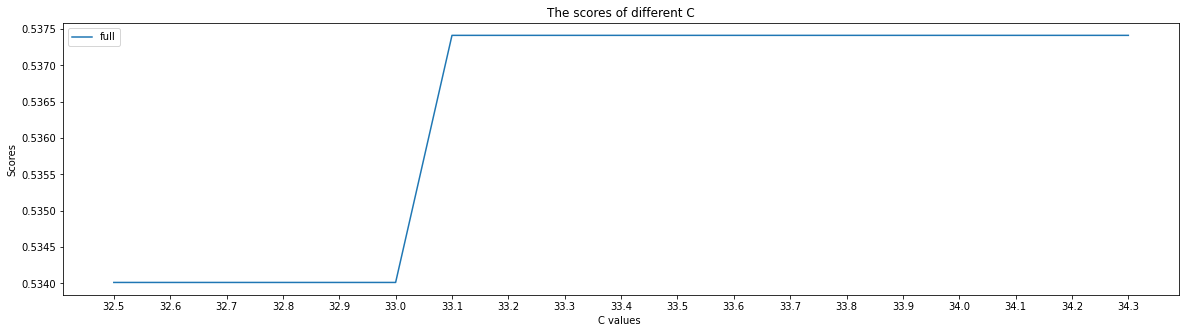

In [33]:
fullx = []
# Inverse of regularization strength
C = np.arange(32.50, 34.31, 0.1)

for i in C:
    LoRe_1 = LoRe(multi_class = "ovr",solver="newton-cg", max_iter=1000, random_state=420, C = i )
    LoRe_1.fit(Xtrain, Ytrain.values.ravel())
    fullx.append(LoRe_1.score(Xtest, Ytest.values.ravel()))
print(max(fullx), "The C index is ",[*C][fullx.index(max(fullx))])
plt.figure(figsize=(20, 5))
plt.plot(C, fullx, label= "full")
plt.title("The scores of different C")
plt.xticks(C)
plt.xlabel("C values ")
plt.ylabel("Scores")
plt.legend()
plt.show()

From the plot and the print information, we can find the best value is 33.1 for parameter C. The score is 0.5374149659863946

### **5.1.4 - Confusion Matrix**

In [34]:
time0 = time()
LoRe_ = LoRe(multi_class = "multinomial",solver="newton-cg", max_iter=1000, random_state=420, C = 33.1 )
LoRe_.fit(Xtrain, Ytrain.values.ravel())
LoRe_.score(Xtest,Ytest)
runTime = time()-time0
print(f"Under the model -  {LoRe_}, the cost time is ", runTime, "s")
AllModelRunTime.append(runTime)

Under the model -  LogisticRegression(C=33.1, max_iter=1000, multi_class='multinomial',
                   random_state=420, solver='newton-cg'), the cost time is  0.1659376621246338 s


<AxesSubplot:>

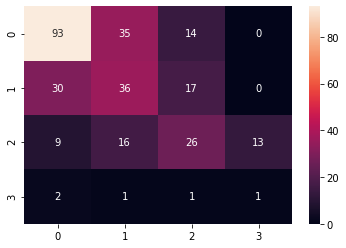

In [35]:
pred_test = LoRe_.predict(Xtest)
confusion_matrix_result = confusion_matrix(pred_test, Ytest)

sns.heatmap(confusion_matrix_result, annot=True, fmt = ".0f")

### **5.1.5 - Classification Report**

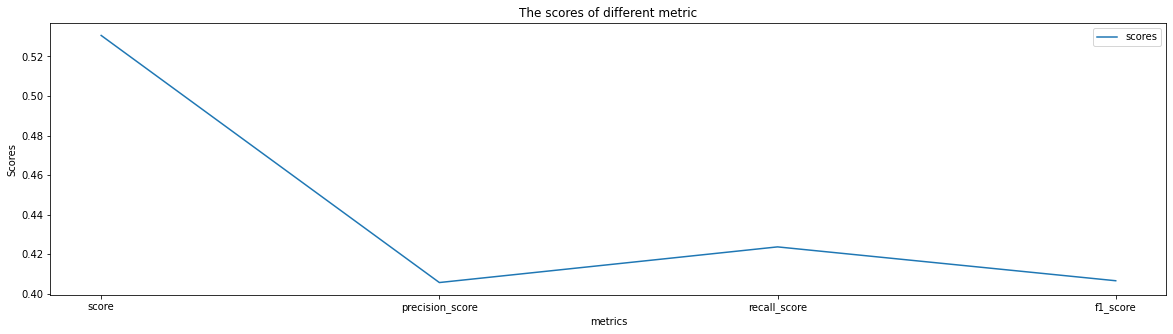

[('score', 0.5306122448979592), ('precision_score', 0.40570629833367866), ('recall_score', 0.42372862930595623), ('f1_score', 0.40661458528716654)]


In [36]:
metric = []
xStr = ["score", "precision_score", "recall_score", "f1_score"]
metric.append(LoRe_.score(Xtest,Ytest))
metric.append(precision_score(pred_test,Ytest, average="macro"))
metric.append(recall_score(pred_test,Ytest, average="macro"))
metric.append(f1_score(pred_test,Ytest, average="macro"))
plt.figure(figsize=(20, 5))
plt.plot(xStr, metric, label= "scores")
plt.title("The scores of different metric")
plt.xticks(xStr)
plt.xlabel("metrics")
plt.ylabel("Scores")
plt.legend()
plt.show()
LoReMetric = [*zip(xStr, metric)]
print(LoReMetric)
list1 = [{'Model': 'LoRe','Accurracy': metric[0], 'Percision': metric[1], 'Recall': metric[2], 'F1': metric[3]}]
AllModelScore.append(metric)

* Best parameters: C is 33.1
* Accuracy: 0.5306122448979592
* Precision: 0.40570629833367866
* Recall: 0.42372862930595623
* F1: 0.40661458528716654
* Fitting time: 0.2110302448272705s

In summary, the best parameter C is 33.1, the socres have been decribe above, as for the models performance I will conclude in the last section of this report.

## **Decision Trees**

**Decision tree** is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees and where the target variable can take continuous value is called the regression tree. In this work, we only focus on classification trees.

**The reason I use this model:** 
* It is suitable for high dimensions dataset
* It compute fast 
* Its accuracy is high

### **5.2.1 - Importing of usefull library**
* train_test_split, accuracy_score, recall_score, precision_score, f1_score, time: same as Logistic Regression part
* graphviz: to show the tree structure
* export_graphviz: Exporting the Tree model to graphviz

In [37]:
from sklearn.tree import DecisionTreeClassifier as DTC
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from time import time

### **5.2.2 - Dataset**

Same as Logistic Regression part

In [38]:
df_DTC = df_pre.copy()
df_DTC_X = df_DTC[[i for i in df_DTC.columns if LABLE not in i ]]
df_DTC_Y = df_DTC[[i for i in df_DTC.columns if LABLE in i ]]

np_DTC_Y = np.array(df_DTC_X)
np_DTC_Y = np.around(df_DTC_Y, decimals=0)

df_DTC_Y = pd.DataFrame(np_DTC_Y, columns=[LABLE], dtype = int)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_DTC_X, df_DTC_Y, test_size = 0.3, random_state = 420)

In [39]:
# Recover the index
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
for i in [Ytrain, Ytest]:
    i.index = range(i.shape[0])

### **5.2.3 - Tune the model**
In order to get the best parameter max_depth, I make a search space for max_depth and set the criterion = "entropy".

max_depth represent the max deep of the tree.


The max score is 0.5986394557823129, the deepth is 5


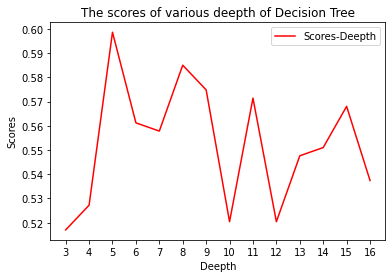

In [40]:
scoreTrees = []
minDeep = 3
maxDeep = 17
for i in range(minDeep, maxDeep):
    clfTree = DTC(criterion = "entropy"
                  , random_state=420
                  , splitter="random"
                 , max_depth = i
    #              , min_samples_leaf = 10
    #              , min_samples_split = 10
                 ).fit(Xtrain, Ytrain)
    scoreTree = clfTree.score(Xtest, Ytest)
    scoreTrees.append(scoreTree)
print(f"The max score is {max(scoreTrees)}, the deepth is {scoreTrees.index(max(scoreTrees)) + minDeep}")
plt.plot(range(minDeep, maxDeep), scoreTrees, color="red", label= "Scores-Deepth")
plt.title("The scores of various deepth of Decision Tree")
plt.xlabel("Deepth")
plt.ylabel("Scores")
plt.xticks(range(minDeep, maxDeep))
plt.legend()
plt.show()

From the plot, and print informations, we can clearly get the best de max_depth is 5, and its score is 0.5986394557823129

### **5.2.4 - Confusion Matrix**

In [41]:
time0 = time()
clfTree = DTC(criterion = "entropy"
              , random_state=420
              , splitter="random"
             , max_depth = 5
#              , min_samples_leaf = 10
#              , min_samples_split = 10
             ).fit(Xtrain, Ytrain)
clfTree.score(Xtest,Ytest)
runTime = time()-time0
print(f"Under the model -  {clfTree}, the cost time is ", runTime, "s")
AllModelRunTime.append(runTime)

Under the model -  DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=420,
                       splitter='random'), the cost time is  0.007989645004272461 s


<AxesSubplot:>

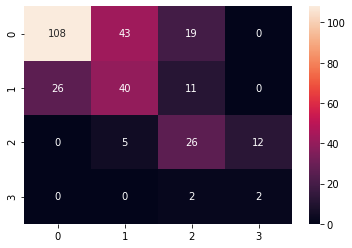

In [42]:
pred_test = clfTree.predict(Xtest)
confusion_matrix_result = confusion_matrix(pred_test, Ytest)

sns.heatmap(confusion_matrix_result, annot=True, fmt = ".0f")

### **5.2.5 - Classification Report**

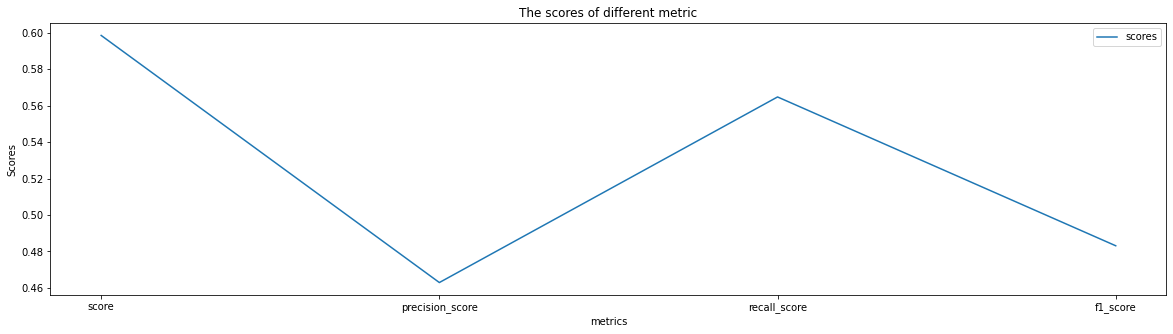

[('score', 0.5986394557823129), ('precision_score', 0.46291215218132353), ('recall_score', 0.564856449979569), ('f1_score', 0.4831121270021739)]


In [43]:
metric = []
xStr = ["score", "precision_score", "recall_score", "f1_score"]
metric.append(clfTree.score(Xtest,Ytest))
metric.append(precision_score(pred_test,Ytest, average="macro"))
metric.append(recall_score(pred_test,Ytest, average="macro"))
metric.append(f1_score(pred_test,Ytest, average="macro"))
plt.figure(figsize=(20, 5))
plt.plot(xStr, metric, label= "scores")
plt.title("The scores of different metric")
plt.xticks(xStr)
plt.xlabel("metrics")
plt.ylabel("Scores")
plt.legend()
plt.show()
DTreeMetric = [*zip(xStr, metric)]
print(DTreeMetric)
AllModelScore.append(metric)

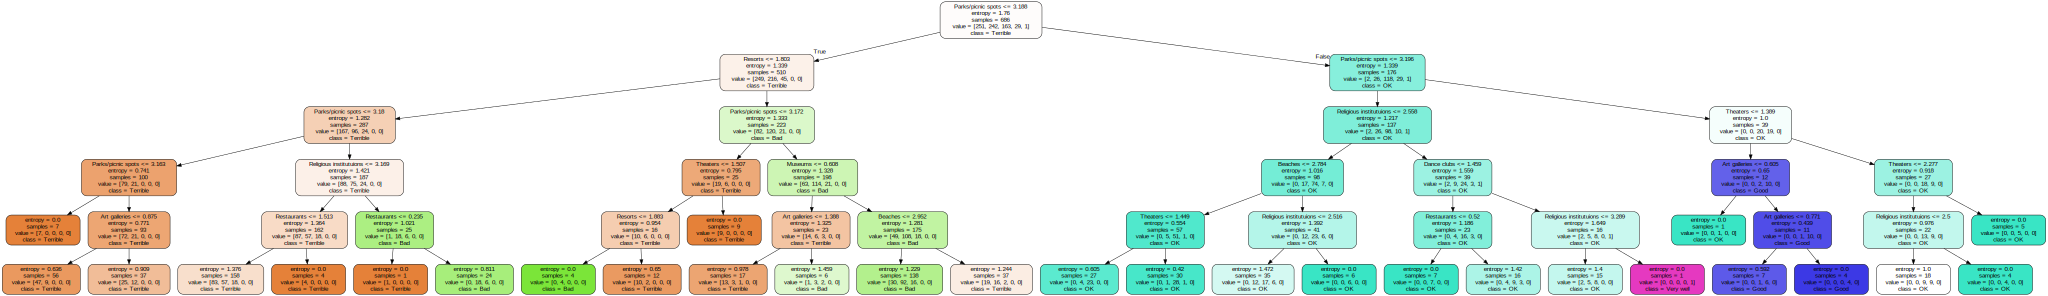

In [44]:
dot_data = export_graphviz(clfTree
                           , feature_names = Xtrain.keys()
                           , class_names = ["Terrible", "Bad", "OK", "Good", "Very well"]
                           , filled = True
                           , rounded = True)
graphTree = graphviz.Source(dot_data)
graphTree

* From the tree structure fig, we can see that there are 5 kind colors which represent the five kind labels. And the entropy more low the color is more deep, vice Versa
* Best parameters: max_depth is 5
* Accuracy: 0.5986394557823129
* Precision: 0.46291215218132353
* Recall: 0.564856449979569
* F1: 0.40661458528716654
* Fitting time: 0.009160280227661133 s

In summary, the best parameter max_depth is 5, the socres have been decribed above, as for the models performance I will conclude in the last section of this report.

## **Random Forest**

**Random forest** is a supervised learning algorithm. The “forest” it builds is an ensemble of decision trees, usually trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

**The reason I use this model:** 
* It is suitable for high dimensions dataset
* It compute fast 
* It perform better than other classification models on lots kinds of dataset
* Random forest is very robust

### **5.3.1 - Importing of usefull library**
* RandomForestClassifier： API for model Random Forest 
* GridSearchCV: It is used to get the best parameters 
* datetime: It is used to transform the data to string type
* others: same to Tree part

In [45]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from time import time
import datetime

### **5.3.2 - Dataset**
Same to Tree part

In [46]:
df_RFC = df_pre.copy()
df_RFC_X = df_RFC[[i for i in df_RFC.columns if LABLE not in i ]]
df_RFC_Y = df_RFC[[i for i in df_RFC.columns if LABLE in i ]]

np_RFC_Y = np.array(df_RFC_X)
np_RFC_Y = np.around(df_RFC_Y, decimals=0)

df_RFC_Y = pd.DataFrame(np_RFC_Y, columns=[LABLE], dtype = int)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_RFC_X, df_RFC_Y, test_size = 0.3, random_state = 420)

In [47]:
# Recover the index
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
for i in [Ytrain, Ytest]:
    i.index = range(i.shape[0])

### **5.3.3 - Tune the model**
In this section, in order to get the best parameters for n_estimators, max_depth, max_features. 
* First, I Coarse-grained search the n_estimators.
* Second, I fine-grained search the n_estimators.
* Last, I use GridSearchCV method to get the best max_depth and max_features

The max score is 0.6530612244897959, the n_estimators is 70


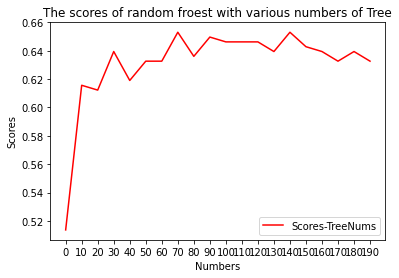

In [48]:
score1 = []
for i in range(0, 200, 10):
    clfRFC = RFC(n_estimators = i+1
                 ,n_jobs = -1
            , random_state = 420).fit(Xtrain,Ytrain.values.ravel())
    score = clfRFC.score(Xtest, Ytest.values.ravel())
    score1.append(score)
print(f"The max score is {max(score1)}, the n_estimators is {(score1.index(max(score1)))*10}")
plt.plot(range(0, 200, 10), score1, color="red", label= "Scores-TreeNums")
plt.title("The scores of random froest with various numbers of Tree")
plt.xlabel("Numbers")
plt.ylabel("Scores")
plt.xticks(range(0, 200, 10))
plt.legend()
plt.show()

We debug the n_estimators value again, to fine-grainedly search the best model

The max score is 0.6530612244897959, the n_estimators is 71


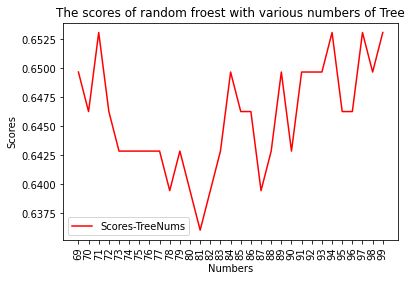

In [49]:
score1 = []
for i in range(69, 100):
    clfRFC = RFC(n_estimators = i
                 ,n_jobs = -1 # the num of thread is the num of CPU cores
            , random_state = 420).fit(Xtrain,Ytrain.values.ravel())
    score = clfRFC.score(Xtest, Ytest.values.ravel())
    score1.append(score)
print(f"The max score is {max(score1)}, the n_estimators is {[*range(69, 100)][score1.index(max(score1))]}")
plt.plot(range(69, 100), score1, color="red", label= "Scores-TreeNums")
plt.title("The scores of random froest with various numbers of Tree")
plt.xlabel("Numbers")
plt.ylabel("Scores")
plt.xticks(rotation=90)
plt.xticks(range(69, 100))
plt.legend()
plt.show()

We use GridSearchCV function to get the best max_depth, max_features under n_estimators = 71

In [50]:
param_grid = {'max_depth': np.arange(1, 20, 1)
              ,'max_features': np.arange(3, 9, 1)
             }
clfRFCGrid = RFC(n_estimators = 71
            , random_state = 420
                 ).fit(Xtrain,Ytrain.values.ravel())
GS = GridSearchCV(clfRFCGrid, param_grid, cv = 2)
GS.fit(df_RFC_X, df_RFC_Y.values.ravel())
bestMaxDepth = GS.best_params_
print(f"The best max_depth is {bestMaxDepth}, and the score is {GS.best_score_}")

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


The best max_depth is {'max_depth': 14, 'max_features': 4}, and the score is 0.673469387755102


There occours error, because there is only one row for a specific class label.

### **5.3.4 - Confusion Matrix**

In [51]:
time0 = time()
clfRFC = RFC(n_estimators = 71
             ,n_jobs = -1 # the num of thread is the num of CPU cores
             , max_depth = 14
             , max_features = 4
             , random_state = 420).fit(Xtrain,Ytrain.values.ravel())
clfRFC.score(Xtest, Ytest.values.ravel())
runTime = time()-time0
print(f"Under the model -  {clfRFC}, the cost time is ", runTime, "s")
AllModelRunTime.append(runTime)

Under the model -  RandomForestClassifier(max_depth=14, max_features=4, n_estimators=71, n_jobs=-1,
                       random_state=420), the cost time is  0.3452157974243164 s


<AxesSubplot:>

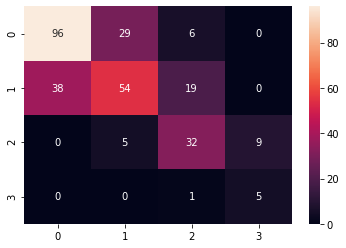

In [52]:
pred_test = clfRFC.predict(Xtest)
confusion_matrix_result = confusion_matrix(pred_test, Ytest)

sns.heatmap(confusion_matrix_result, annot=True, fmt = ".0f")

### **5.3.5 - Classification Report**

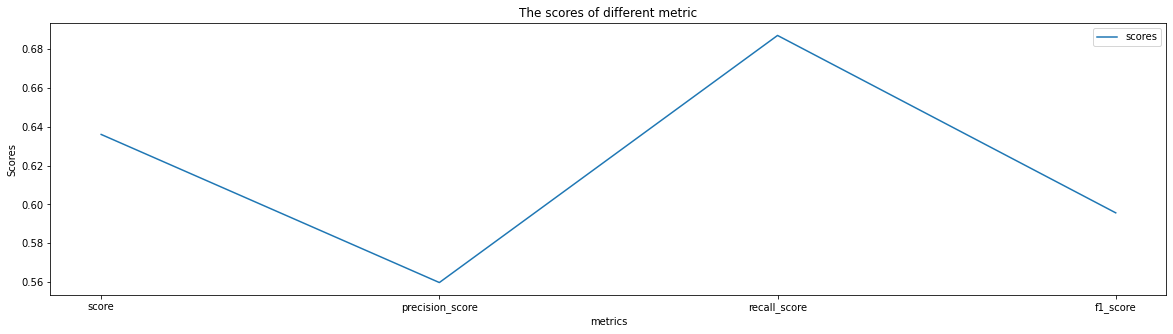

[('score', 0.6360544217687075), ('precision_score', 0.5597303172895041), ('recall_score', 0.6870741053034448), ('f1_score', 0.595656621277651)]


In [53]:
metric = []
xStr = ["score", "precision_score", "recall_score", "f1_score"]
metric.append(clfRFC.score(Xtest,Ytest))
metric.append(precision_score(pred_test,Ytest, average="macro"))
metric.append(recall_score(pred_test,Ytest, average="macro"))
metric.append(f1_score(pred_test,Ytest, average="macro"))
plt.figure(figsize=(20, 5))
plt.plot(xStr, metric, label= "scores")
plt.title("The scores of different metric")
plt.xticks(xStr)
plt.xlabel("metrics")
plt.ylabel("Scores")
plt.legend()
plt.show()
RFClassMetric = [*zip(xStr, metric)]
print(RFClassMetric)
AllModelScore.append(metric)

* Best parameters: max_depth is 14, max_features = 4, n_estimators=71
* Accuracy: 0.6394557823129252
* Precision: 0.6085951651282325
* Recall: 0.7089358131431627
* F1: 0.6447399972270159
* Fitting time: 0.35091733932495117 s

In summary, the best parameter max_depth is 14, max_features = 4, n_estimators=71. And the socres have been decribed above, as for the models performance I will conclude in the last section of this report.

## **Support Vector Classification**

**A Support Vector Machine** is a classifier defined by a separating hyperplane, i.e. given a supervised learning problem, it outputs an optimal hyperplane which categorizes new samples. For instance, in a 2-dimensional space, it corresponds to a line dividing a plane in two parts - such that each class lies on either side.

The Hard margin SVM is very rigid in classification and tries to always find a linearly separable hyperplane between two classes. Hard margin causes overfitting and a single outliner can determine the boundary , which makes the classifier over sensitive to noise and data. The formulation of the hard margin is :

$y_{i}\left[<w, x_{i}>+b \geq 1\right]$

Since it is not possible to have a linearly separable hyperplane, the hard margin SVM (i.e., no misclassification allowed) is not feasible.

The Soft margin SVM overcomes this problem by introducing slack variables :

$\begin{array}{c}\min \frac{1}{2}\|w\|^{2}+C \sum_{i} \zeta_{i} \\\text { subject to } y_{i}\left[<w, x_{i}>+b\right] \geq 1-\zeta_{i} \zeta_{i} \geq 0\end{array}$

**The reason I use this model:** 
* Excellent generalization ability
* Not sensitive to outliers

### **5.4.1 - Importing of usefull library**
* SVC： API of Support vector machine
* Others: Same as random froest part

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from time import time
import datetime

### **5.4.2 - Dataset**

In [55]:
df_SVC = df_pre.copy()
df_SVC_X = df_SVC[[i for i in df_SVC.columns if LABLE not in i ]]
df_SVC_Y = df_SVC[[i for i in df_SVC.columns if LABLE in i ]]

np_SVC_Y = np.array(df_SVC_X)
np_SVC_Y = np.around(df_SVC_Y, decimals=0)

df_SVC_Y = pd.DataFrame(np_SVC_Y, columns=[LABLE], dtype = int)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_SVC_X, df_SVC_Y, test_size = 0.3, random_state = 420)

In [56]:
# Recover the index
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
for i in [Ytrain, Ytest]:
    i.index = range(i.shape[0])

### **5.4.3 - Tune the model**

In order to get the best parameter, I divide it into two parts:
* First, Search different kernel for the SVC
* Second, According to the first step, make sure the parameter that need to debug. Then search this parameter

Under kernel linear, the cost time is  00:00:030834
Under kernel poly, the cost time is  00:00:036540
Under kernel rbf, the cost time is  00:00:046239
Under kernel sigmoid, the cost time is  00:00:065815
The max score is 0.5578231292517006, the kernel is poly


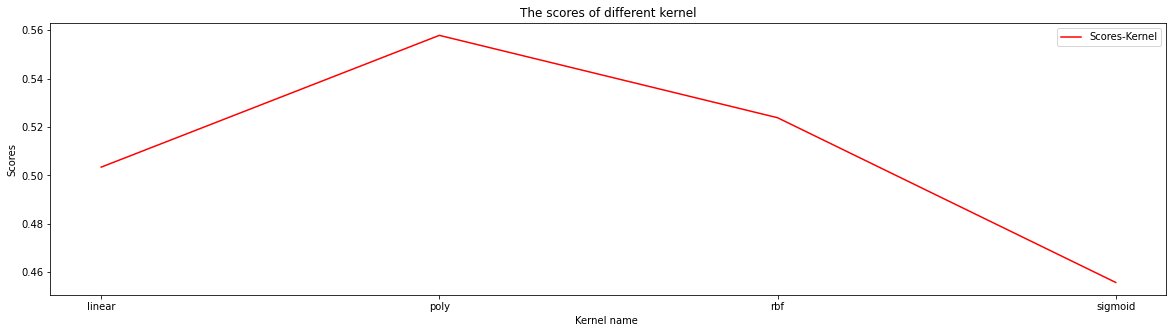

In [57]:
Kernel = ["linear", "poly", "rbf", "sigmoid"]
score1 = []
for kernel in Kernel:
    time0 = time()
    clfSVC1 = SVC(kernel = kernel
                , gamma = "auto"
                , cache_size = 5000).fit(Xtrain, Ytrain.values.ravel())
#     print("The accuracy under kernel %s is %f"%(kernel, clfSVC1.score(Xtest, Ytest)))
    score = clfSVC1.score(Xtest, Ytest.values.ravel())
    score1.append(score)
    print(f"Under kernel {kernel}, the cost time is ", datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print(f"The max score is {max(score1)}, the kernel is {[*Kernel][score1.index(max(score1))]}")
plt.figure(figsize=(20, 5))
plt.plot(Kernel, score1,color="red", label= "Scores-Kernel")
plt.title("The scores of different kernel")
plt.xticks(Kernel)
plt.xlabel("Kernel name ")
plt.ylabel("Scores")
plt.legend()
plt.show()

We search the best degree by using different degree under kernel = "poly"

Under degree 0, the cost time is  00:00:028414
Under degree 1, the cost time is  00:00:028310
Under degree 2, the cost time is  00:00:030347
Under degree 3, the cost time is  00:00:035590
Under degree 4, the cost time is  00:00:062510
Under degree 5, the cost time is  00:00:197363
Under degree 6, the cost time is  00:00:924490
Under degree 7, the cost time is  00:04:203184
Under degree 8, the cost time is  00:18:903002
Under degree 9, the cost time is  00:53:387252
The max score is 0.5986394557823129, the degree is 6


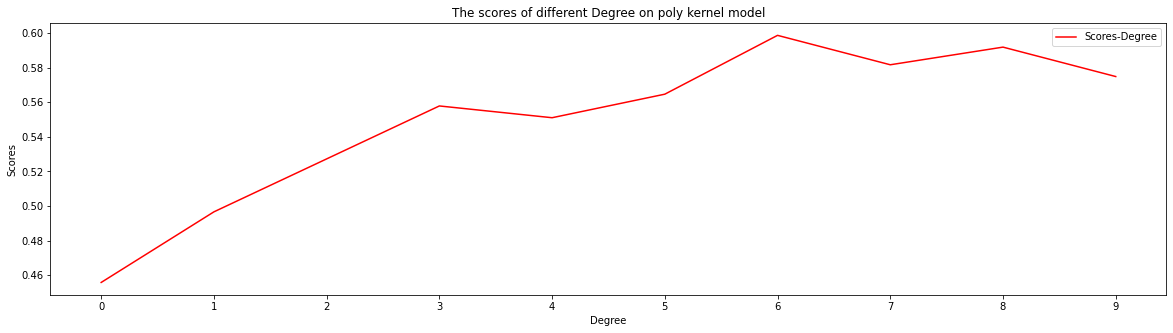

In [58]:
score1 = []
for degree in range(10):
    time0 = time()
    clfSVC2 = SVC(kernel = "poly"
                , gamma = "auto"
                , degree = degree
                , cache_size = 5000).fit(Xtrain, Ytrain.values.ravel())
    score = clfSVC2.score(Xtest, Ytest.values.ravel())
    score1.append(score)
    print(f"Under degree {degree}, the cost time is ", datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print(f"The max score is {max(score1)}, the degree is {[*range(10)][score1.index(max(score1))]}")
plt.figure(figsize=(20, 5))
plt.plot(range(10), score1, color="red", label= "Scores-Degree")
plt.title("The scores of different Degree on poly kernel model")
plt.xticks(range(10))
plt.xlabel("Degree")
plt.ylabel("Scores")
plt.legend()
plt.show()

### **5.4.4 - Confusion Matrix**

In [59]:
time0 = time()
clfSVC = SVC(kernel = "poly"
                , gamma = "auto"
                , degree = 6
                , cache_size = 5000).fit(Xtrain, Ytrain.values.ravel())
clfSVC.score(Xtest,Ytest)
runTime = time()-time0
print(f"Under the model -  {clfSVC}, the cost time is ", runTime, "s")
AllModelRunTime.append(runTime)

Under the model -  SVC(cache_size=5000, degree=6, gamma='auto', kernel='poly'), the cost time is  0.9277992248535156 s


<AxesSubplot:>

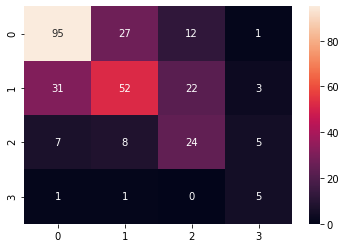

In [60]:
pred_test = clfSVC.predict(Xtest)
confusion_matrix_result = confusion_matrix(pred_test, Ytest)

sns.heatmap(confusion_matrix_result, annot=True, fmt = ".0f")

### **5.4.5 - Classification Report**

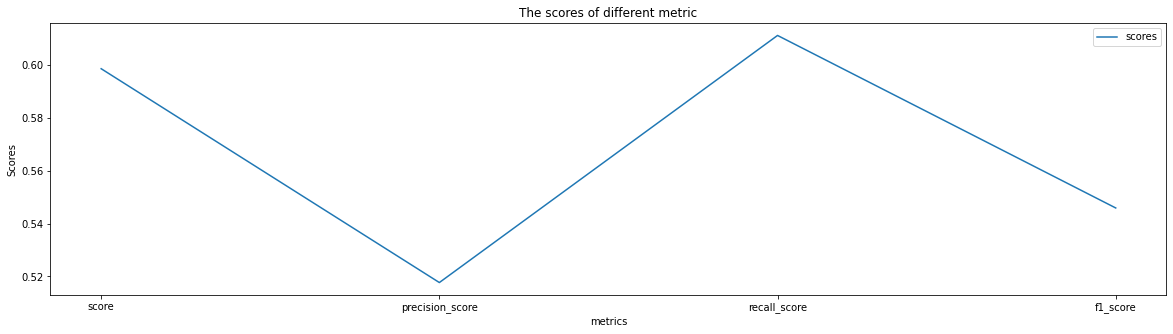

[('score', 0.5986394557823129), ('precision_score', 0.5177000688452053), ('recall_score', 0.6112313612313612), ('f1_score', 0.5459276647461959)]


In [61]:
metric = []
xStr = ["score", "precision_score", "recall_score", "f1_score"]
metric.append(clfSVC.score(Xtest,Ytest))
metric.append(precision_score(pred_test,Ytest, average="macro"))
metric.append(recall_score(pred_test,Ytest, average="macro"))
metric.append(f1_score(pred_test,Ytest, average="macro"))
plt.figure(figsize=(20, 5))
plt.plot(xStr, metric, label= "scores")
plt.title("The scores of different metric")
plt.xticks(xStr)
plt.xlabel("metrics")
plt.ylabel("Scores")
plt.legend()
plt.show()
SVCMetric = [*zip(xStr, metric)]
print(SVCMetric)
AllModelScore.append(metric)

* Best parameters: kernel is = ploy, degree is =6
* Accuracy: 0.5986394557823129
* Precision: 0.5177000688452053
* Recall: 0.6112313612313612
* F1: 0.545927664746195
* Fitting time: 0.9392356872558594 s


In summary, the best parameter ernel is = ploy, degree is =6. And the socres have been decribed above, as for the models performance I will conclude in the last section of this report.

## **Bayes**

The Bayes optimal classifier is a classification technique. It is an ensemble of all the hypotheses in the hypothesis space. On average, no other ensemble can outperform it.  The Bayes optimal classifier can be expressed with the following equation:

$y=\underset{c_{j} \in C}{\operatorname{argmax}} \sum_{h_{i} \in H} P\left(c_{j} \mid h_{i}\right) P\left(T \mid h_{i}\right) P\left(h_{i}\right)$

where ${\displaystyle y}$ is the predicted class, ${\displaystyle C}$ is the set of all possible classes, ${\displaystyle H}$ is the hypothesis space, ${\displaystyle P}$ refers to a probability, and ${\displaystyle T}$ is the training data. As an ensemble, the Bayes optimal classifier represents a hypothesis that is not necessarily in ${\displaystyle H}$. The hypothesis represented by the Bayes optimal classifier, however, is the optimal hypothesis in ensemble space (the space of all possible ensembles consisting only of hypotheses in ${\displaystyle H}$).

**The reason I use this model:** 
* If the data is independent distribution, this model will perform very well.
* Because it is one kind of classification model, I use it as Comparative Experiment.

### **5.5.1 - Importing of usefull library**

* GNB， MNB， BNB， CNB： APIs for bayes model
* others: same to the random froest model

In [62]:
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.naive_bayes import BernoulliNB as BNB
from sklearn.naive_bayes import ComplementNB as CNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from time import time
import datetime

### **5.5.2 - Dataset**

In [63]:
df_GNB = df_pre.copy()
df_GNB_X = df_GNB[[i for i in df_GNB.columns if LABLE not in i ]]
df_GNB_Y = df_GNB[[i for i in df_GNB.columns if LABLE in i ]]

np_GNB_Y = np.array(df_GNB_X)
np_GNB_Y = np.around(df_GNB_Y, decimals=0)

df_GNB_Y = pd.DataFrame(np_GNB_Y, columns=[LABLE], dtype = int)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_GNB_X, df_GNB_Y, test_size = 0.3, random_state = 420)

In [64]:
# Recover the index
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
for i in [Ytrain, Ytest]:
    i.index = range(i.shape[0])

### **5.5.3 - Tune the Model**

Because there is no debugable parameter for bayes model, I set 4 kind bayes model to get the best model.

Under the model -  GaussianNB(), the cost time is  00:00:008087
Under the model -  MultinomialNB(), the cost time is  00:00:007150
Under the model -  BernoulliNB(), the cost time is  00:00:007002
Under the model -  ComplementNB(), the cost time is  00:00:006540
The max score is 0.4965986394557823, the model is GaussianNB()


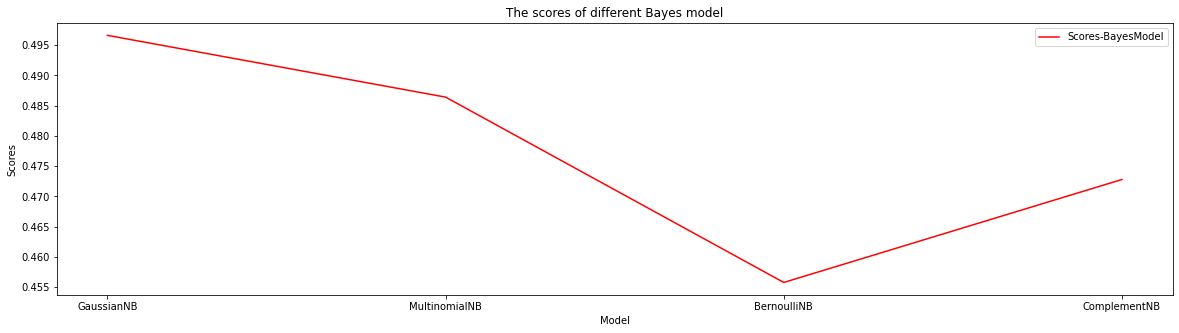

In [65]:
model = [GNB(), MNB(), BNB(), CNB()]
score1 = []
for m in model:
    time0 = time()
    clfNB = m.fit(Xtrain, Ytrain.values.ravel())
    clfNB.score(Xtest, Ytest)
    score = clfNB.score(Xtest, Ytest.values.ravel())
    score1.append(score)
    print(f"Under the model -  {m}, the cost time is ", datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
print(f"The max score is {max(score1)}, the model is {[*model][score1.index(max(score1))]}")
plt.figure(figsize=(20, 5))
plt.plot(["GaussianNB", "MultinomialNB", "BernoulliNB", "ComplementNB"], score1, color="red", label= "Scores-BayesModel")
plt.title("The scores of different Bayes model")
plt.xticks(["GaussianNB", "MultinomialNB", "BernoulliNB", "ComplementNB"])
plt.xlabel("Model")
plt.ylabel("Scores")
plt.legend()
plt.show()

### **5.5.4 - Confusion Matrix**

In [66]:
time0 = time()
clfGNB = GNB().fit(Xtrain, Ytrain.values.ravel())
clfGNB.score(Xtest, Ytest)
runTime = time()-time0
print(f"Under the model -  {clfGNB}, the cost time is ", runTime, "s")
AllModelRunTime.append(runTime)

Under the model -  GaussianNB(), the cost time is  0.006399869918823242 s


<AxesSubplot:>

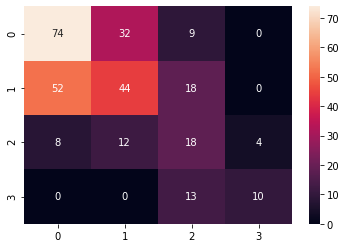

In [67]:
pred_test = clfGNB.predict(Xtest)
confusion_matrix_result = confusion_matrix(pred_test, Ytest)

sns.heatmap(confusion_matrix_result, annot=True, fmt = ".0f")

### **5.5.5 - Classification Report**

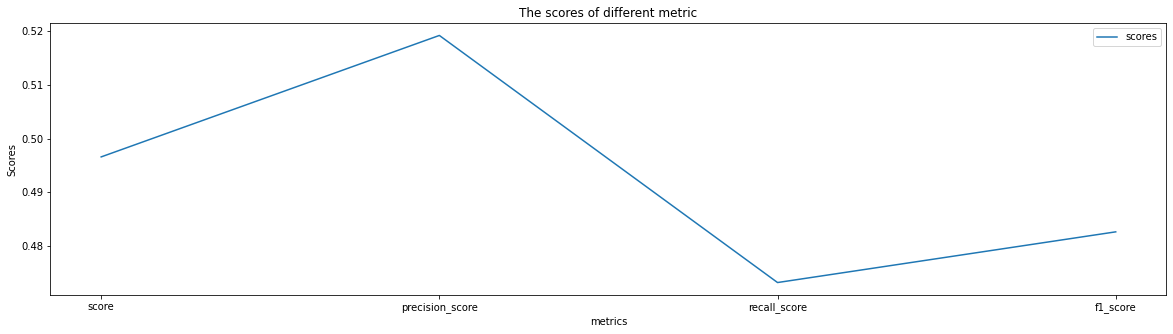

[('score', 0.4965986394557823), ('precision_score', 0.5192173369605176), ('recall_score', 0.4731993026043369), ('f1_score', 0.4826404037342842)]


In [68]:
metric = []
xStr = ["score", "precision_score", "recall_score", "f1_score"]
metric.append(clfGNB.score(Xtest,Ytest))
metric.append(precision_score(pred_test,Ytest, average="macro"))
metric.append(recall_score(pred_test,Ytest, average="macro"))
metric.append(f1_score(pred_test,Ytest, average="macro"))
plt.figure(figsize=(20, 5))
plt.plot(xStr, metric, label= "scores")
plt.title("The scores of different metric")
plt.xticks(xStr)
plt.xlabel("metrics")
plt.ylabel("Scores")
plt.legend()
plt.show()
GNBMetric = [*zip(xStr, metric)]
print(GNBMetric)
AllModelScore.append(metric)

* Best model: GNB
* Accuracy: 0.4965986394557823
* Precision: 0.5192173369605176
* Recall: 0.4731993026043369
* F1: 0.4826404037342842
* Fitting time: 0.007589817047119141 s


In summary, the best modle is GNB. And the socres have been decribed above, as for the models performance I will conclude in the last section of this report.

## **KNN**

The intuition behind the KNN classifier with parameter k is straightforward:

Given a set of training examples $\left\{x_{i} y_{i}\right\}$ and a testing point that ${\displaystyle x}$ we want to label, we compute the distance $D\left(x, x_{i}\right)$ for every point in the training set and the output class  ${\displaystyle y}$ of ${\displaystyle x}$ according to the most frequent label among closet distances $x_{i 1} \ldots \ldots x_{i k}$

The choice of the distance measure is crucial for the KNN classifier. It defines the similarity between 2 samples and can have a huge impact on the performance of the algorithm. The
most general metric is so called the $L_p$ norm or the Minkowsky distance:

$L_{p}(x, y)=\left(\sum_{i=1}^{d}\left|x_{i}-y_{i}\right|^{p}\right)^{\frac{1}{p}}$

The most used one is the $L2$ norm also known as ${\displaystyle Euclidean distance}$, which is nothing but Minkowsky distance a parameter${\displaystyle Euclidean distance}$ ${\displaystyle p=2}$. Here I have decided to use Euclidean Distance as a distance measure.

**The reason I use this model:** 
* It is not senstive to outliers
* Because it is one kind of classification model, I use it as Comparative Experiment.

### **5.6.1 - Importing of usefull library**
* KNeighborsClassifier: API of KNN
* Others: Same the random froest part

In [69]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from time import time
import datetime

### **5.6.2 - Dataset**

In [70]:
df_KNC = df_pre.copy()
df_KNC_X = df_KNC[[i for i in df_KNC.columns if LABLE not in i ]]
df_KNC_Y = df_KNC[[i for i in df_KNC.columns if LABLE in i ]]

np_KNC_Y = np.array(df_KNC_X)
np_KNC_Y = np.around(df_KNC_Y, decimals=0)

df_KNC_Y = pd.DataFrame(np_KNC_Y, columns=[LABLE], dtype = int)

Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_KNC_X, df_KNC_Y, test_size = 0.3, random_state = 420)

In [71]:
# Recover the index
for i in [Xtrain, Xtest]:
    i.index = range(i.shape[0])
for i in [Ytrain, Ytest]:
    i.index = range(i.shape[0])

### **5.6.3 - Tune the model**

We use the GridSearchCV function to search the best parameters n_neighbors and "algorithm" 

In [72]:
param_grid = {"n_neighbors": np.arange(1,9)
              ,"algorithm": ["kd_tree","brute", "ball_tree"]}
clfKNN1 = KNC()
GS = GridSearchCV(clfKNN1, param_grid, cv = 2, )
GS.fit(df_KNC_X, df_KNC_Y.values.ravel())
print(f"The best parameters is {GS.best_params_}, and the score is {GS.best_score_}")

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)


The best parameters is {'algorithm': 'kd_tree', 'n_neighbors': 7}, and the score is 0.5224489795918368


### **5.6.4 - Confusion Matrix**

In [73]:

time0 = time()
clfKNN = KNC(n_neighbors = 7, algorithm = 'kd_tree').fit(Xtrain, Ytrain.values.ravel())
runTime = time()-time0
print(f"Under the model -  {clfKNN}, the cost time is ", runTime, "s")
AllModelRunTime.append(runTime)

Under the model -  KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7), the cost time is  0.0034453868865966797 s


<AxesSubplot:>

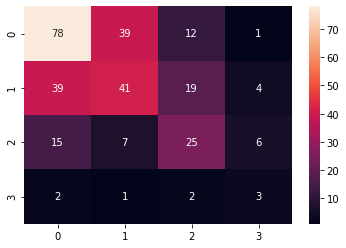

In [74]:
pred_test = clfKNN.predict(Xtest)
confusion_matrix_result = confusion_matrix(pred_test, Ytest)

sns.heatmap(confusion_matrix_result, annot=True, fmt = ".0f")

### **5.6.5 - Classification Report**

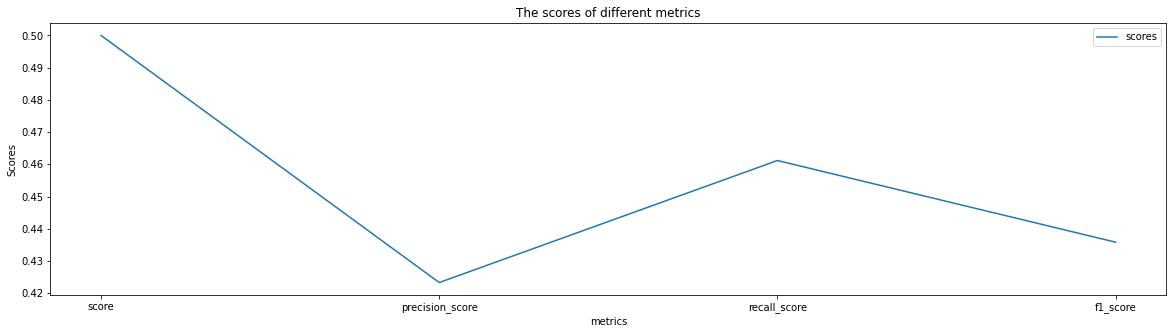

[('score', 0.5), ('precision_score', 0.4233297100480579), ('recall_score', 0.4611890914086829), ('f1_score', 0.4358515464536407)]


In [75]:
metric = []
xStr = ["score", "precision_score", "recall_score", "f1_score"]
metric.append(clfKNN.score(Xtest,Ytest))
metric.append(precision_score(pred_test,Ytest, average="macro"))
metric.append(recall_score(pred_test,Ytest, average="macro"))
metric.append(f1_score(pred_test,Ytest, average="macro"))
plt.figure(figsize=(20, 5))
plt.plot(xStr, metric, label= "scores")
plt.title("The scores of different metrics")
plt.xticks(xStr)
plt.xlabel("metrics")
plt.ylabel("Scores")
plt.legend()
plt.show()
KNNMetric = [*zip(xStr, metric)]
print(KNNMetric)
AllModelScore.append(metric)

* Best parameter: algorithm='kd_tree', n_neighbors=7
* Accuracy: 0.5
* Precision: 0.4233297100480579
* Recall: 0.4611890914086829
* F1: 0.4358515464536407
* Fitting time: 0.0038149356842041016 s


In summary, the best parameter0.5 is algorithm='kd_tree', n_neighbors=7. And the socres have been decribed above, as for the models performance I will conclude in the last section of this report.

# **Conclusion**

In this report we used three kind model on our Dataset.

* Cluster model: **Kmeans, DBSCAN**
* Regression model: **Linear Regression**
* Classification model: **Logistic Regreesion, Tree, Random Forest, Support Vector Machine, Bayes, K-Nearest Neighbours**
* We also used the **PCA** model to try to reduce the dimensions of our dataset

1. For the cluster model, we find the dataset is very hard to devide. According this we can reasonablely conclude the dataset can not be devided, they are one kind data
2. For the Regression model, we get a not bad model which accuracy is 
3. For the PCA, we find the top-3(totaly 9) components only bring about 60% information. That means PCA does not suit our dataset
4. For the Classification model, I draw a table to show the differences of them on vairous aspect(Accuracy, Precision, Recall, F1, Hyperparameters Tuning)


|  Model Name  | Accuracy |  Precision | Recall | F1 | Hyperparameters Tuning |   Runtime |          
| ------------ | -------- | -------- | -------- | -------- | -------- | -------- |
| Logistic Regression | 53.06% | 40.57%  | 42.37%  | 40.66%  | C = np.arange(32.50, 34.31, 0.1)   |  0.16542863845825195  |
| Decision Tree | 59.86% | 46.29% | 56.49%  | 48.31% | max_depth in range(3, 17):   |   0.008707284927368164   |
| Random Forest | 63.95% | 60.86% | 70.89%  | 64.47% |  n_enstimators in range(69, 100) <br/> n_enstimators in range(0, 200, 10) |   0.4589717388153076     |
| Support Vector Classifier | 59.86% | 51.77% | 61.12%  | 54.59%  | ["linear", "poly", "rbf", "sigmoid"] <br/> degree in range(10)i in range(69, 100)  |   0.8468155860900879      |
|    Bayes      | 49.66% | 51.92% | 47.32%  | 48.26%  |  GNB(), MNB(), BNB(), CNB()  |    0.00682830810546875     |
| K-Nearest Neighbors | 50.00% | 42.33% | 46.12% | 43.59%  |  {"n_neighbors": np.arange(1,9),<br/>"algorithm": ["kd_tree","brute", "ball_tree"]}  |       0.002736330032348633      |

From the table we can see, Random Forest Classifer perform better on our dataset. For the Accuacy, Precision, Reacall and F1, the RFC got the best scores. For the fit time, it only used about 0.459 secs. In contrast, the KNN and Logistic Regreesion perform very bad. So, we can reasonablely conclude that the two model does not suit our dataset. But they cost very less time to fit. In order to clearly analysis the result, I draw the fellowing two plots to show the result

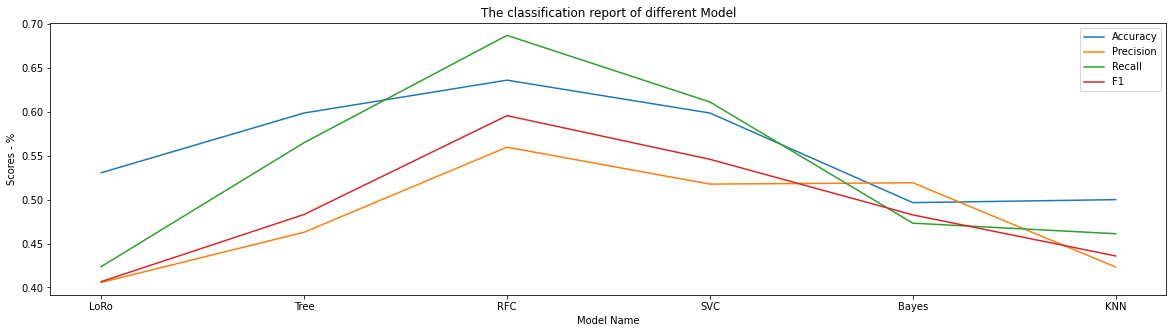

In [76]:
Final = np.array(AllModelScore)
Model = ['LoRo', 'Tree', 'RFC', 'SVC', 'Bayes', 'KNN']
plt.figure(figsize=(20, 5))
plt.plot(Model, Final[:, 0], label= "Accuracy")
plt.plot(Model, Final[:, 1], label= "Precision")
plt.plot(Model, Final[:, 2], label= "Recall")
plt.plot(Model, Final[:, 3], label= "F1")
plt.title("The classification report of different Model")
plt.xticks(Model)
plt.xlabel("Model Name")
plt.ylabel("Scores - %")
plt.legend()
plt.show()

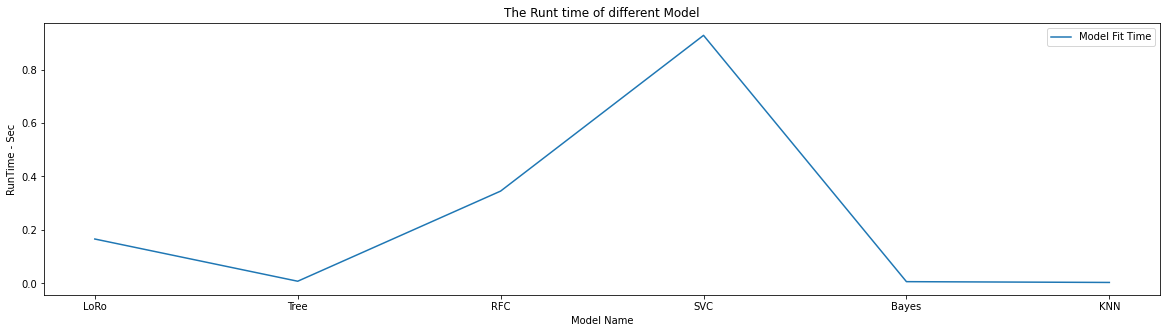

In [77]:
Model = ['LoRo', 'Tree', 'RFC', 'SVC', 'Bayes', 'KNN']
plt.figure(figsize=(20, 5))
plt.plot(Model,AllModelRunTime, label= "Model Fit Time")
plt.title("The Runt time of different Model")
plt.xticks(Model)
plt.xlabel("Model Name")
plt.ylabel("RunTime - Sec")
plt.legend()
plt.show()

* From the first plot, it shows us that the best classification model is Random Froest Classificer. It performs very well on the four kind measures. It also shows that the KNN and Logistic Regression model's performances are terrible.
* From the second plot, we can see that the SVC model's time is the largest one in the 6 models. And the Tree, Bayes and KNN models' fitting time do not exceed 0.01 Secs. Our best model just cost about 0.5 Secs to fit.

In summary, on our dataset, the Random Froest model performs very well and its fitting time is also low, just about 0.4 Secs. Besides, we find the KNN, Bayes and Tree fitted very fast, no one exceed 0.01 Secs. Combine with the fitting time, we can know the logistic Regression performs very terrible on our dataset. According to this, we can resonablely reasoning that our dataset has non linear dataset. 

# **Tools**

The libraries which is used are as follows: 

* Matplotlib
* Seaborn
* Pandas
* Numpy
* Scikit learn
* Time
* DateTime